In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##Trend Analysis
: How have global air pollution levels changed over time? Are there any noticeable trends or patterns?
Regional Comparison: Which regions or countries have the highest and lowest levels of air pollution? Are there any significant differences between regions?
Seasonal Variations:
 How does air pollution vary throughout the year? Are there any seasonal trends or fluctuations?
Impact of Urbanization: Is there a correlation between urbanization rates and air pollution levels? How do pollution levels differ between urban and rural areas?
Correlation Analysis:
 Are there any correlations between air pollution levels and other factors such as population density, industrial activity, or transportation infrastructure?
Health Impact Assessment:
 Can you analyze the potential health impacts of air pollution based on available data? Are there any regions with particularly concerning levels of pollution in terms of public health?
Policy Evaluation:
 How effective have past policies or interventions been in reducing air pollution? Can you identify any successful strategies or areas for improvement?
Predictive Modeling:
 Can you develop a predictive model to forecast future air pollution levels based on historical data and relevant predictors?
Data Visualization: 
Create visualizations to illustrate key findings and trends in the dataset, making it easier for stakeholders to understand and interpret the data.

In [4]:
import pandas as pd
global_pollution_df=pd.read_csv('/home/eli/ReDI/excersice/data/AQI and Lat Long of Countries.csv')
#global_pollution_df=pd.read_csv('/home/eli/ReDI/excersice/data/global air pollution dataset.csv')



global_pollution_df.columns = map(str.lower, global_pollution_df.columns)
global_pollution_df.head()


country              city  aqi value aqi category  co aqi value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2              Brazil  Presidente Dutra         41         Good             1   
3               Italy   Priolo Gargallo         66     Moderate             1   
4              Poland         Przasnysz         34         Good             1   

  co aqi category  ozone aqi value ozone aqi category  no2 aqi value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good                5               Good              1   
3            Good               39               Good              2   
4            Good               34               Good              0   

  no2 aqi category  pm2.5 aqi value pm2.5 aqi category      lat      lng  
0             Good               51           Moderate  44.7444  44.2031  
1             Good               41               Good  -5.2900 -44.4900  
2             Good               41               Good -11.2958 -41.9869  
3             Good               66           Moderate  37.1667  15.1833  
4             Good               20               Good  53.0167  20.8833

In [7]:
# Define a list of countries for which you want to apply abbreviations
countries_to_abbreviate = ["United States of America", "United Kingdom of Great Britain",
                           "Democratic Republic of the Congo","Bolivia (Plurinational State of)",
"Papua New Guinea","Democratic Republic of the Congo","Iran (Islamic Republic of)",
"Saint Vincent and the Grenadines","United Arab Emirates","Russian Federation","Republic of Korea"]

# Define the abbreviations for these countries
country_abbreviations = {
    "United States of America": "USA",
    "United Kingdom of Great Britain and Northern Ireland": "UK",
    "Democratic Republic of the Congo": "Congo" ,
    "Bolivia (Plurinational State of)": "Bolivia",
    "Papua New Guinea":"Papua NG",
    "Iran (Islamic Republic of)":"Iran",
    "Saint Vincent and the Grenadines": "Saint Vincent",
    "United Arab Emirates":"UAE",
    "Russian Federation":"Russian",
    "Republic of Korea":"Korea"

   
}

# Apply abbreviations only to selected countries
global_pollution_df['country'] = global_pollution_df['country'].apply(lambda x: country_abbreviations.get(x, x))


In [6]:
category_palette = {
    'Good': '#8d9c87',
    'Moderate': '#e4f3d5',
    'Unhealthy for Sensitive Groups': '#d9896e',
    'Unhealthy': '#a86048',
    'Very Unhealthy': '#71432b',
    'Hazardous': '#7e0023'
}



In [7]:
print(global_pollution_df.shape[0])
print(global_pollution_df.shape[1])

16695
14


In [8]:
global_pollution_df.describe()

aqi value  co aqi value  ozone aqi value  no2 aqi value  \
count  16695.000000  16695.000000     16695.000000   16695.000000   
mean      62.998682      1.342138        31.767355       3.819647   
std       43.091971      2.371379        22.839343       5.880677   
min        7.000000      0.000000         0.000000       0.000000   
25%       38.500000      1.000000        20.000000       0.000000   
50%       52.000000      1.000000        29.000000       2.000000   
75%       69.000000      1.000000        38.000000       5.000000   
max      500.000000    133.000000       222.000000      91.000000   

       pm2.5 aqi value           lat           lng  
count     16695.000000  16695.000000  16695.000000  
mean         59.821324     30.267148     -3.944485  
std          43.208298     22.947398     73.037148  
min           0.000000    -54.801900   -171.750000  
25%          34.000000     16.515450    -75.180000  
50%          52.000000     38.815800      5.643100  
75%          69.000000     46.683300     36.275000  
max         500.000000     70.767000    178.017800

In [9]:
global_pollution_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             16393 non-null  object 
 1   city                16695 non-null  object 
 2   aqi value           16695 non-null  int64  
 3   aqi category        16695 non-null  object 
 4   co aqi value        16695 non-null  int64  
 5   co aqi category     16695 non-null  object 
 6   ozone aqi value     16695 non-null  int64  
 7   ozone aqi category  16695 non-null  object 
 8   no2 aqi value       16695 non-null  int64  
 9   no2 aqi category    16695 non-null  object 
 10  pm2.5 aqi value     16695 non-null  int64  
 11  pm2.5 aqi category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB


In [10]:
global_pollution_df.duplicated("city").sum()
global_pollution_df= global_pollution_df.drop_duplicates(subset="city", keep='first')
global_pollution_df.head()


country              city  aqi value aqi category  co aqi value  \
0  Russian        Praskoveya         51     Moderate             1   
1   Brazil  Presidente Dutra         41         Good             1   
3    Italy   Priolo Gargallo         66     Moderate             1   
4   Poland         Przasnysz         34         Good             1   
5      USA       Punta Gorda         54     Moderate             1   

  co aqi category  ozone aqi value ozone aqi category  no2 aqi value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
3            Good               39               Good              2   
4            Good               34               Good              0   
5            Good               14               Good             11   

  no2 aqi category  pm2.5 aqi value pm2.5 aqi category      lat      lng  
0             Good               51           Moderate  44.7444  44.2031  
1             Good               41               Good  -5.2900 -44.4900  
3             Good               66           Moderate  37.1667  15.1833  
4             Good               20               Good  53.0167  20.8833  
5             Good               54           Moderate  16.1005 -88.8074

In [9]:
global_pollution_df.isnull().sum()

country               273
city                    0
aqi value               0
aqi category            0
co aqi value            0
co aqi category         0
ozone aqi value         0
ozone aqi category      0
no2 aqi value           0
no2 aqi category        0
pm2.5 aqi value         0
pm2.5 aqi category      0
lat                     0
lng                     0
dtype: int64

In [11]:
#deleting the row which contain missing value for city
global_pollution_df.dropna(subset=['city'],inplace=True)

In [11]:
#fill the nan value with "Missing" 
#global_pollution_df["country"].fillna("Missing",inplace= True)
#missing_countries = global_pollution_df[global_pollution_df['country'] == 'Missing']

#missing_countries


##finding value for missing value of 273 conutries

In [12]:
#getting dataset which contains city of the world

city_to_country_df=pd.read_csv("/home/eli/ReDI/excersice/data/worldcities.csv")

city_to_country_df.head()

city city_ascii      lat       lng    country iso2 iso3   admin_name  \
0      Tokyo      Tokyo  35.6897  139.6922      Japan   JP  JPN        Tōkyō   
1    Jakarta    Jakarta  -6.1750  106.8275  Indonesia   ID  IDN      Jakarta   
2      Delhi      Delhi  28.6100   77.2300      India   IN  IND        Delhi   
3  Guangzhou  Guangzhou  23.1300  113.2600      China   CN  CHN    Guangdong   
4     Mumbai     Mumbai  19.0761   72.8775      India   IN  IND  Mahārāshtra   

   capital  population          id  
0  primary  37732000.0  1392685764  
1  primary  33756000.0  1360771077  
2    admin  32226000.0  1356872604  
3    admin  26940000.0  1156237133  
4    admin  24973000.0  1356226629

In [13]:


# Create a dictionary from the city-to-country DataFrame
city_to_country_dict = pd.Series(city_to_country_df['country'].values, index=city_to_country_df['city']).to_dict()

# Define the function to update missing country values
def update_country(row, city_to_country_dict):
    if pd.isnull(row['country']) and row['city'] in city_to_country_dict:
        return city_to_country_dict[row['city']]
    else:
        return row['country']

# Apply the function to update missing country values
global_pollution_df['country'] = global_pollution_df.apply(update_country, axis=1, args=(city_to_country_dict,))

# Save the updated DataFrame
global_pollution_df.to_csv('updated_global_pollution.csv', index=False)



In [14]:
global_pollution_df.isna().sum()

country               0
city                  0
aqi value             0
aqi category          0
co aqi value          0
co aqi category       0
ozone aqi value       0
ozone aqi category    0
no2 aqi value         0
no2 aqi category      0
pm2.5 aqi value       0
pm2.5 aqi category    0
lat                   0
lng                   0
dtype: int64

NameError: name 'wedges' is not defined

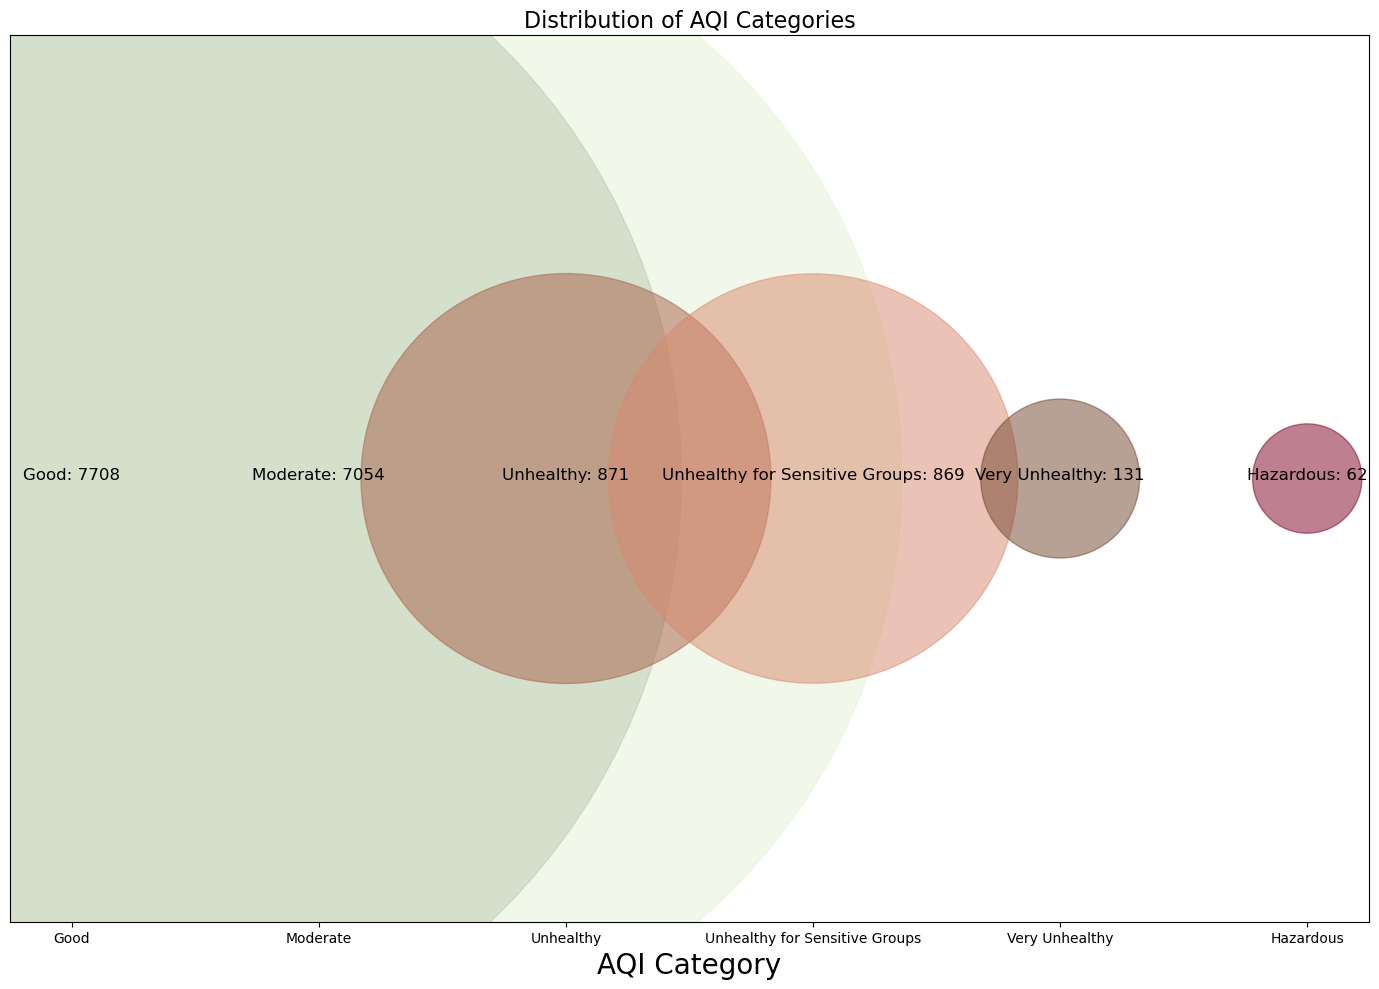

In [8]:

# Calculate the value counts for AQI categories
aqi_category_count = global_pollution_df['aqi category'].value_counts()

# Create the bubble chart
fig, ax = plt.subplots(figsize=(14, 10))
bubble = ax.scatter(aqi_category_count.index, [1]*len(aqi_category_count), 
                    s=aqi_category_count.values * 100, alpha=0.5, 
                    color=[category_palette[category] for category in aqi_category_count.index])

# Customize the plot
for i, (category, count) in enumerate(aqi_category_count.items()):
    ax.text(i, 1, f'{category}: {count}', ha='center', fontsize=12)
ax.set_yticks([])  # Remove the y-axis
plt.title('Distribution of AQI Categories', fontsize=16)
plt.xlabel('AQI Category', fontsize=20)
plt.tight_layout()

# Create a legend with percentages
legend_labels = [f'{cat}: {count/sum(aqi_category_count.values)*100:.1f}%' for cat, count in aqi_category_count.items()]
ax.legend(wedges , legend_labels, title="AQI Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)
# Display the plot
plt.show()


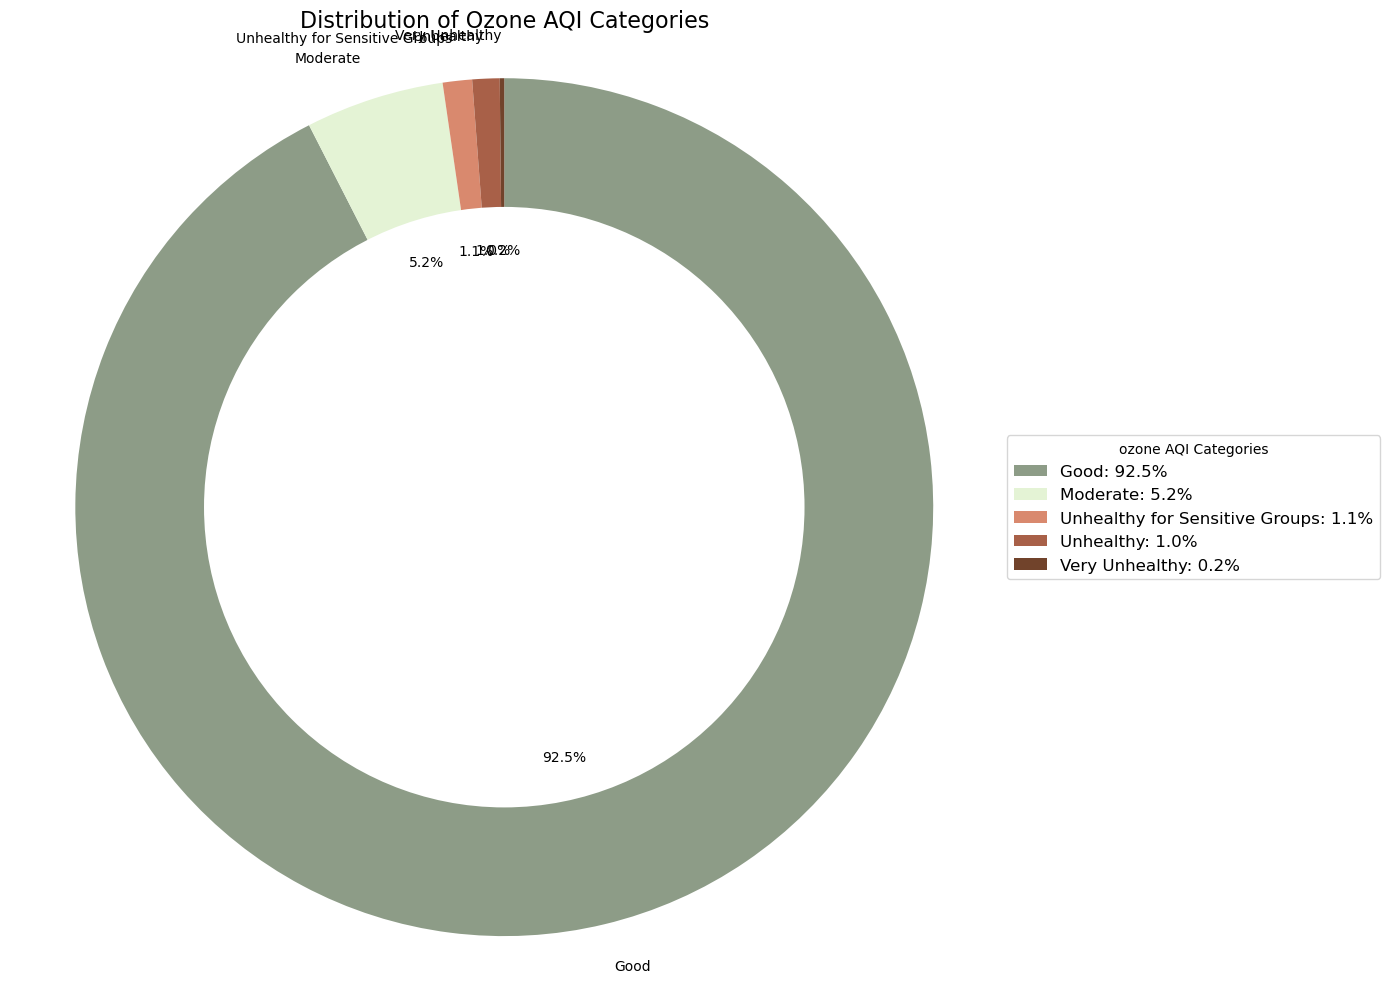

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the value counts for AQI categories
aqi_category_count = global_pollution_df['ozone aqi category'].value_counts()

# Map the colors from the category_palette to the AQI categories
colors = [category_palette[category] for category in aqi_category_count.index]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(14,10))

# Donut plot
wedges, texts, autotexts = ax.pie(aqi_category_count.values, 
                                  labels=aqi_category_count.index, 
                                  autopct='%1.1f%%', 
                                  startangle=90, 
                                  counterclock=False, 
                                  colors=colors)
# Create a circle at the center to make it look like a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Add a title
plt.title('Distribution of Ozone AQI Categories', fontsize=16)

# Create a legend with percentages
legend_labels = [f'{cat}: {count/sum(aqi_category_count.values)*100:.1f}%' for cat, count in aqi_category_count.items()]
ax.legend(wedges, legend_labels, title="ozone AQI Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)

# Adjust plot to make room for the legend
plt.tight_layout()
plt.show()

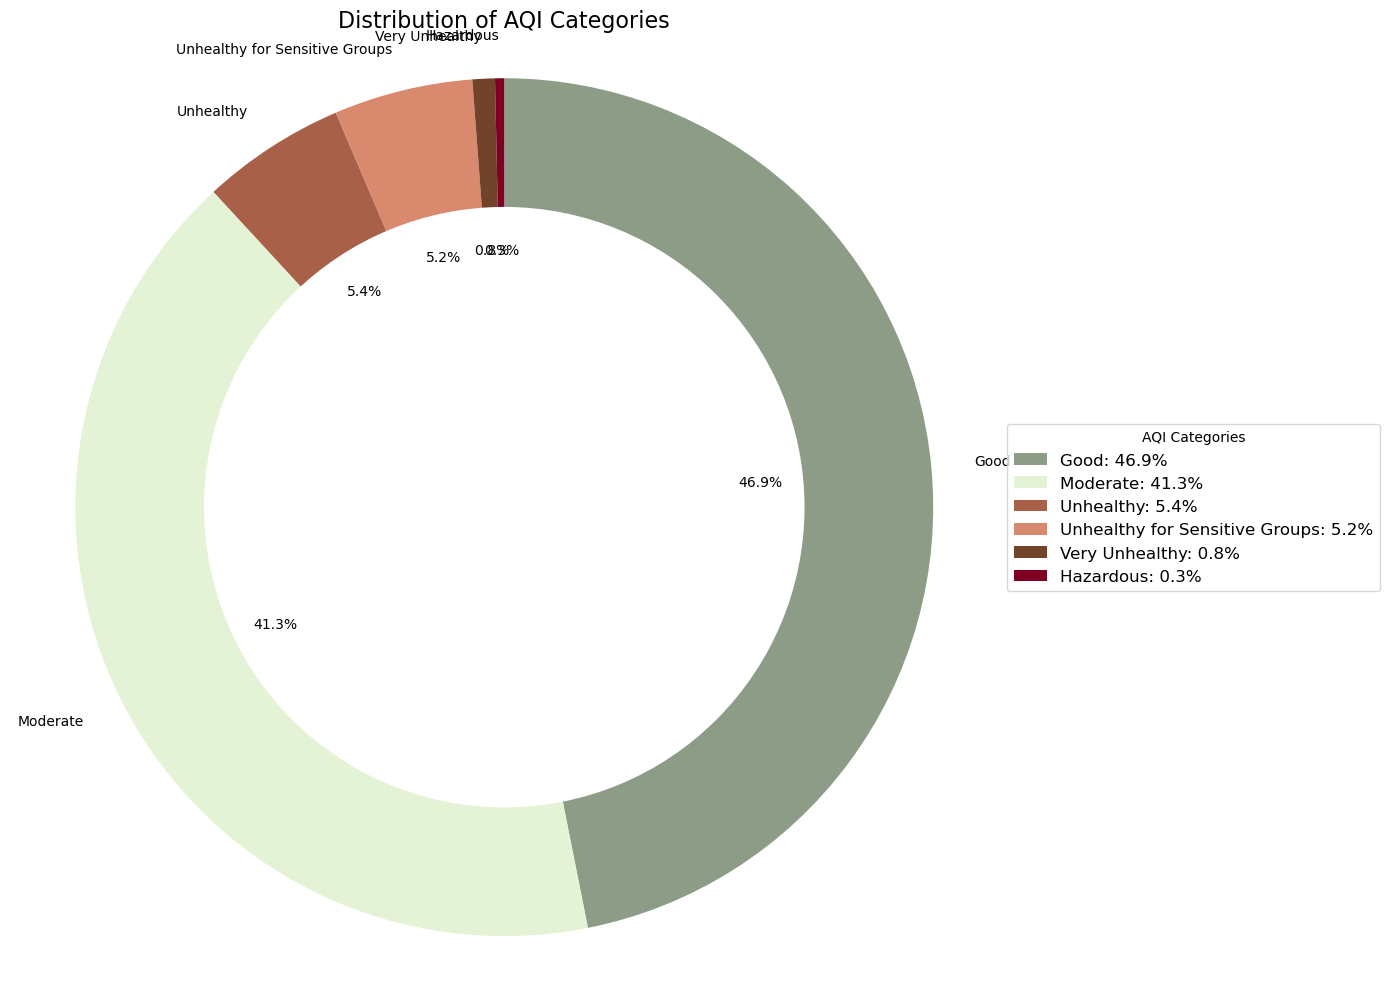

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the value counts for AQI categories
aqi_category_count = global_pollution_df['aqi category'].value_counts()

# Map the colors from the category_palette to the AQI categories
colors = [category_palette[category] for category in aqi_category_count.index]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(14,10))

# Donut plot
wedges, texts, autotexts = ax.pie(aqi_category_count.values, 
                                  labels=aqi_category_count.index, 
                                  autopct='%1.1f%%', 
                                  startangle=90, 
                                  counterclock=False, 
                                  colors=colors)

# Create a circle at the center to make it look like a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Add a title
plt.title('Distribution of AQI Categories', fontsize=16)

# Create a legend with percentages
legend_labels = [f'{cat}: {count/sum(aqi_category_count.values)*100:.1f}%' for cat, count in aqi_category_count.items()]
ax.legend(wedges, legend_labels, title="AQI Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)

# Adjust plot to make room for the legend
plt.tight_layout()
plt.show()


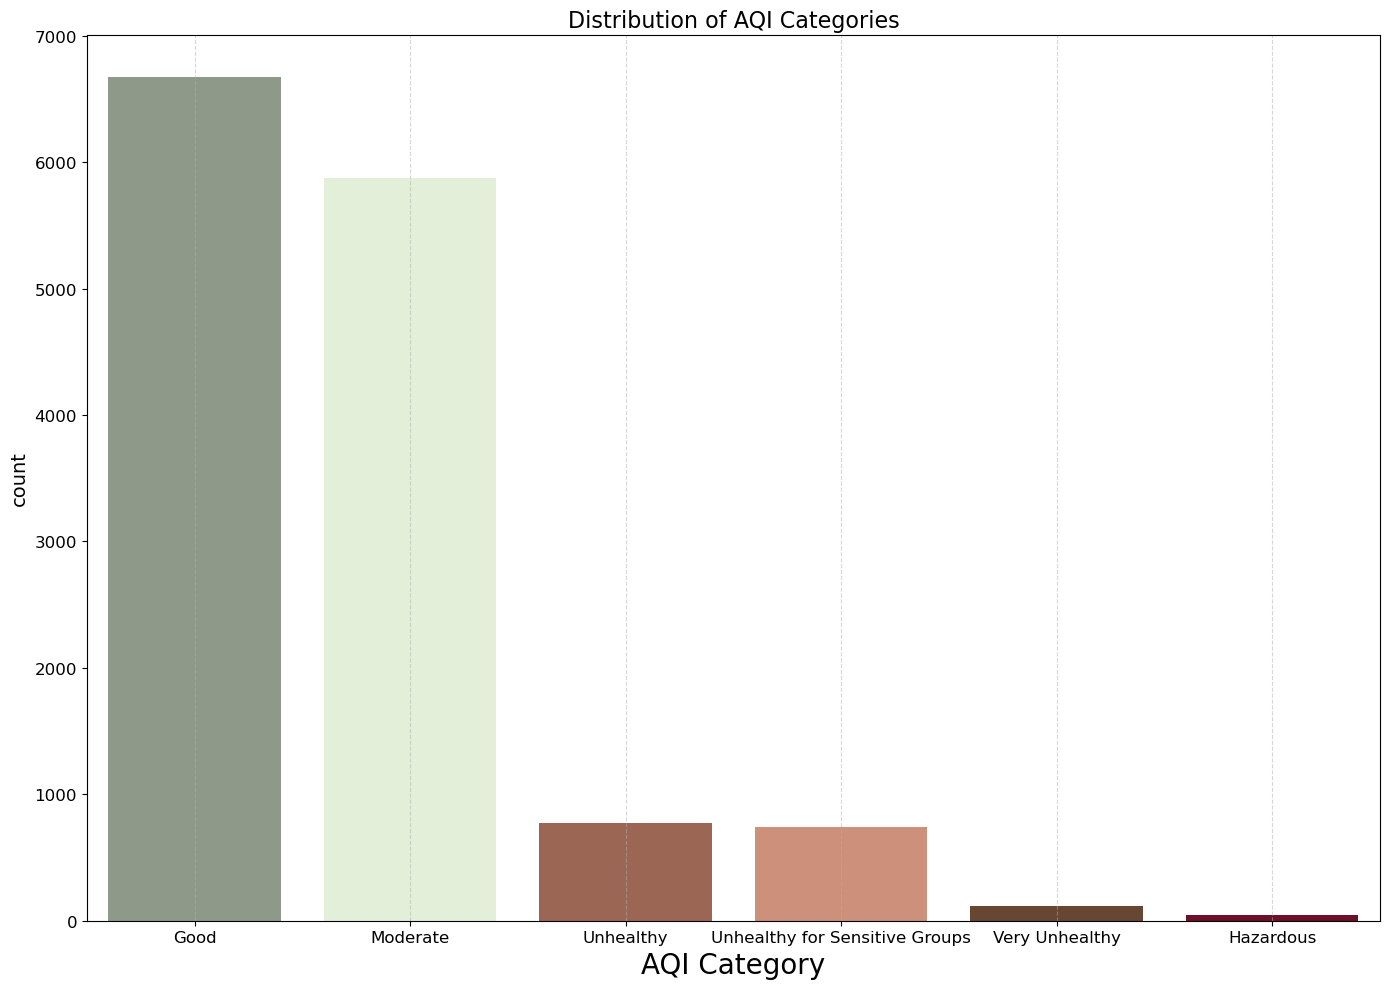

In [15]:

aqi_category_count=global_pollution_df['aqi category'].value_counts()
plt.figure(figsize=(14, 10))
sns.barplot(x=aqi_category_count.index, y=aqi_category_count.values , palette=category_palette)

plt.ylabel('count', fontsize=14)
plt.xlabel('AQI Category', fontsize=20)
plt.title('Distribution of AQI Categories', fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

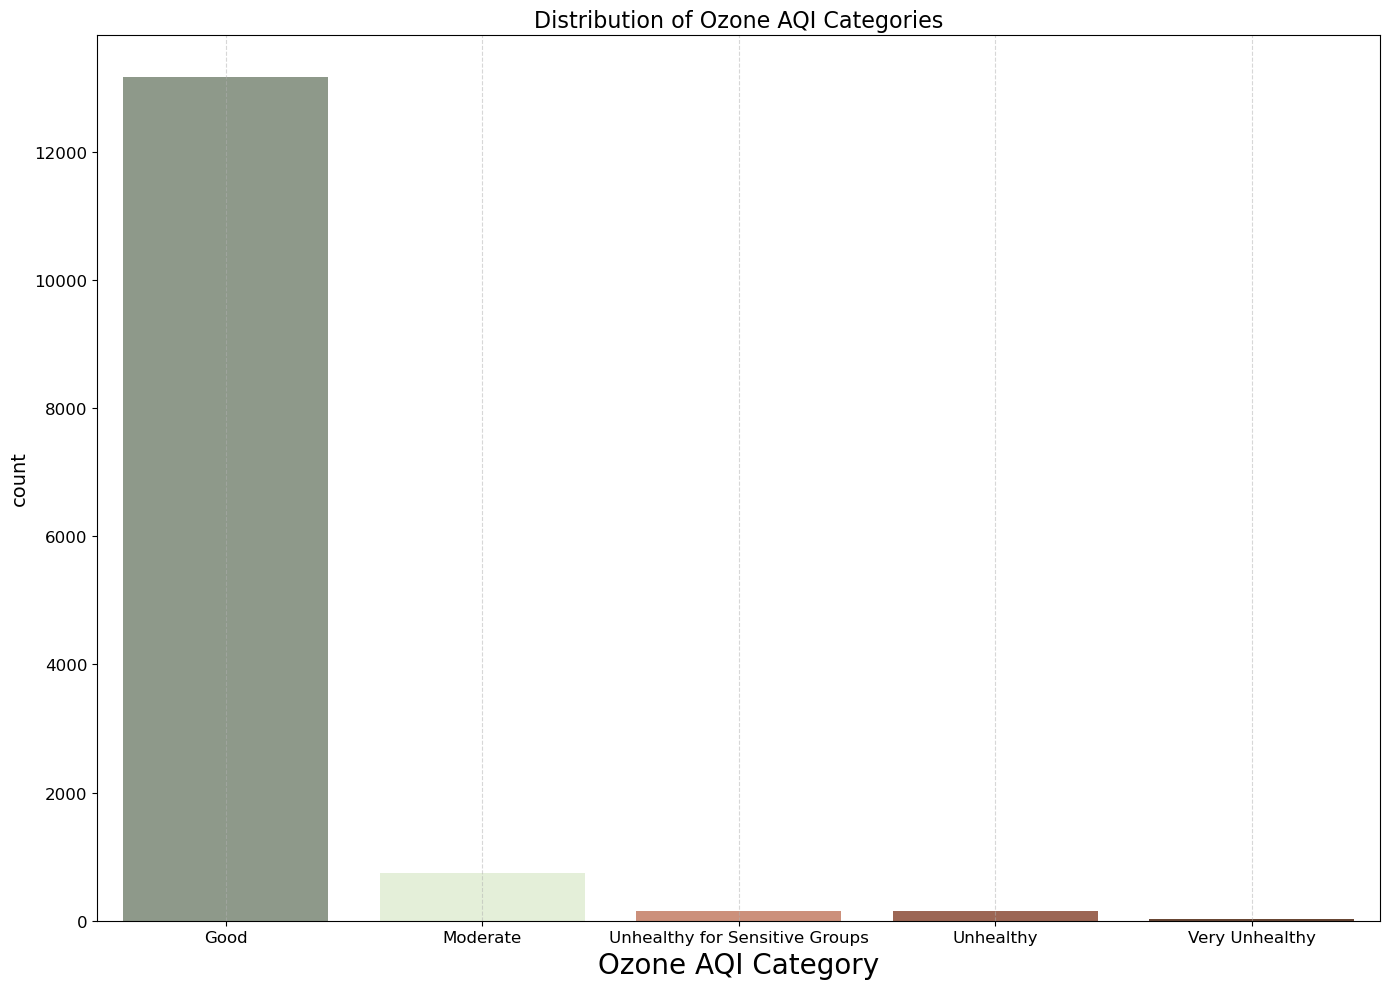

In [16]:
ozone_aqi_category_count=global_pollution_df['ozone aqi category'].value_counts()
plt.figure(figsize=(14, 10))
sns.barplot(x=ozone_aqi_category_count.index, y=ozone_aqi_category_count.values , palette=category_palette)

plt.ylabel('count', fontsize=14)
plt.xlabel('Ozone AQI Category', fontsize=20)
plt.title('Distribution of Ozone AQI Categories', fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

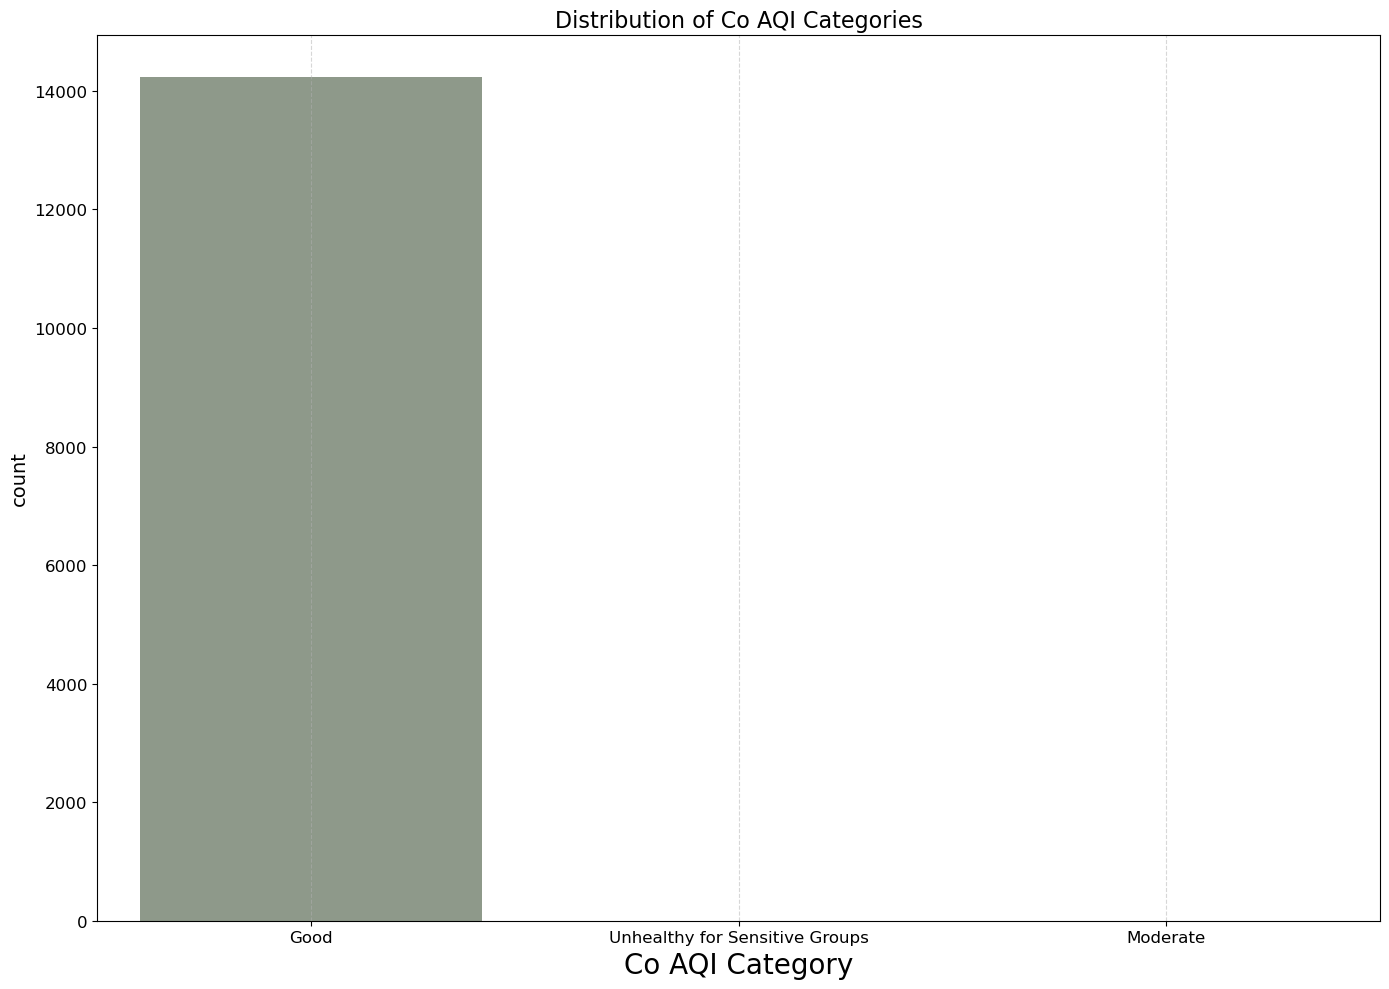

In [17]:
co_aqi_category_count=global_pollution_df['co aqi category'].value_counts()
plt.figure(figsize=(14, 10))
sns.barplot(x=co_aqi_category_count.index, y=co_aqi_category_count.values , palette=category_palette)

plt.ylabel('count', fontsize=14)
plt.xlabel('Co AQI Category', fontsize=20)
plt.title('Distribution of Co AQI Categories', fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

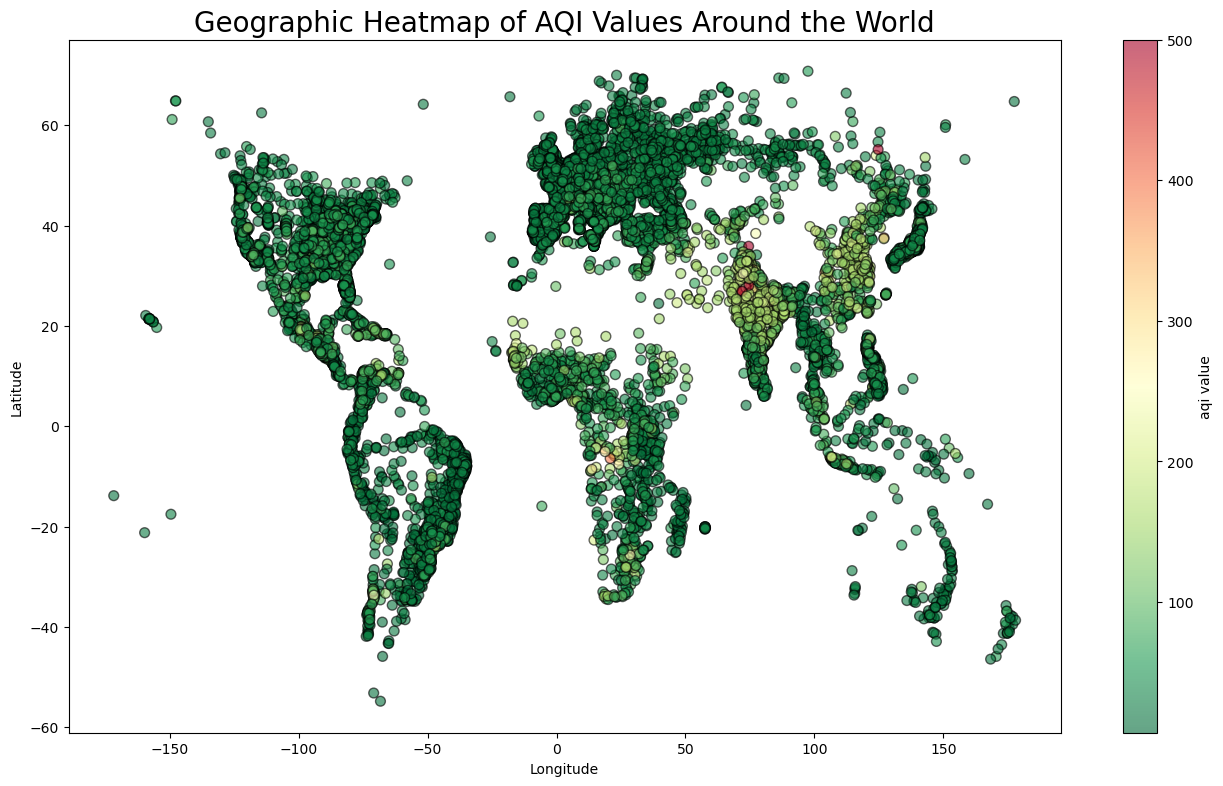

In [18]:
global_pollution_df = global_pollution_df.dropna(subset=['country'])

# Create a scatter plot with a colormap for AQI values
plt.figure(figsize=(16, 9))
scatter = plt.scatter(
    global_pollution_df['lng'], global_pollution_df['lat'], 
    c=global_pollution_df['aqi value'], cmap='RdYlGn_r', s=50, alpha=0.6, edgecolor='k'
)
plt.colorbar(scatter, label='aqi value')
plt.title('Geographic Heatmap of AQI Values Around the World', fontsize=20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

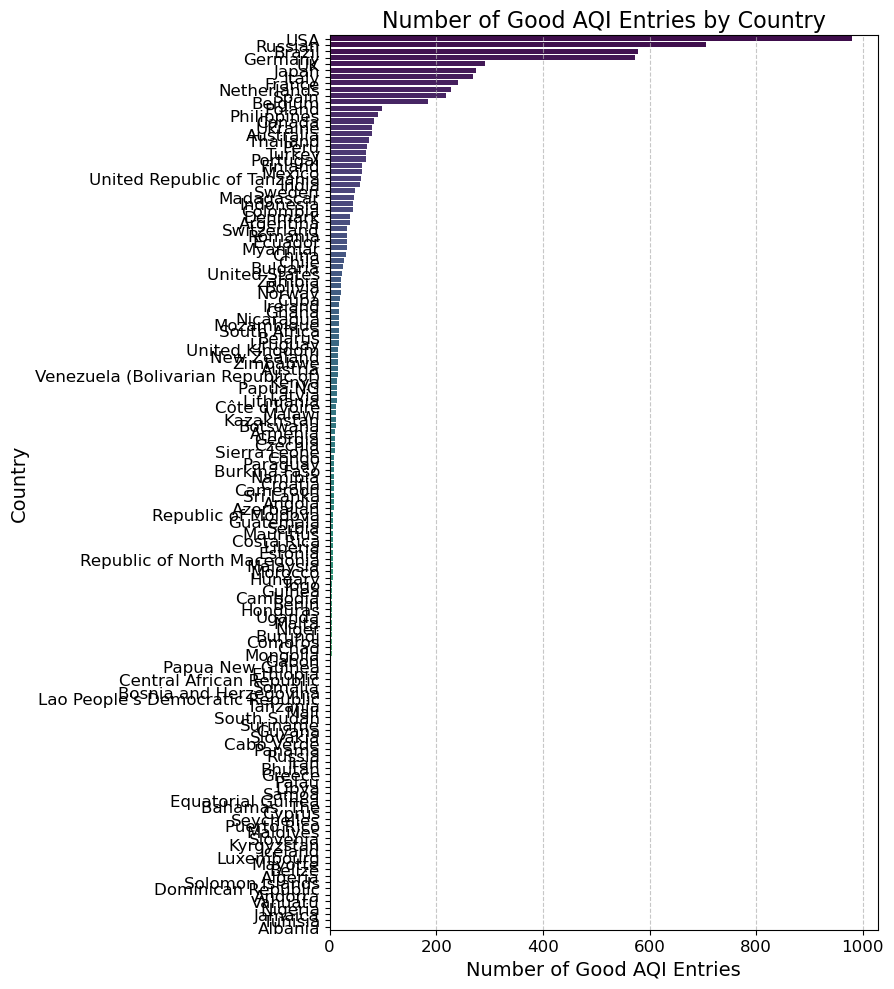

In [19]:
healthy=global_pollution_df[global_pollution_df["aqi category"]=='Good']
city_count_series=healthy["country"].value_counts()
city_count= city_count_series.reset_index()

city_count.columns = ['country', 'count']

plt.figure(figsize=(9, 10))
sns.barplot(x='count', y='country', data=city_count, palette='viridis')
plt.xlabel('Number of Good AQI Entries', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Number of Good AQI Entries by Country', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


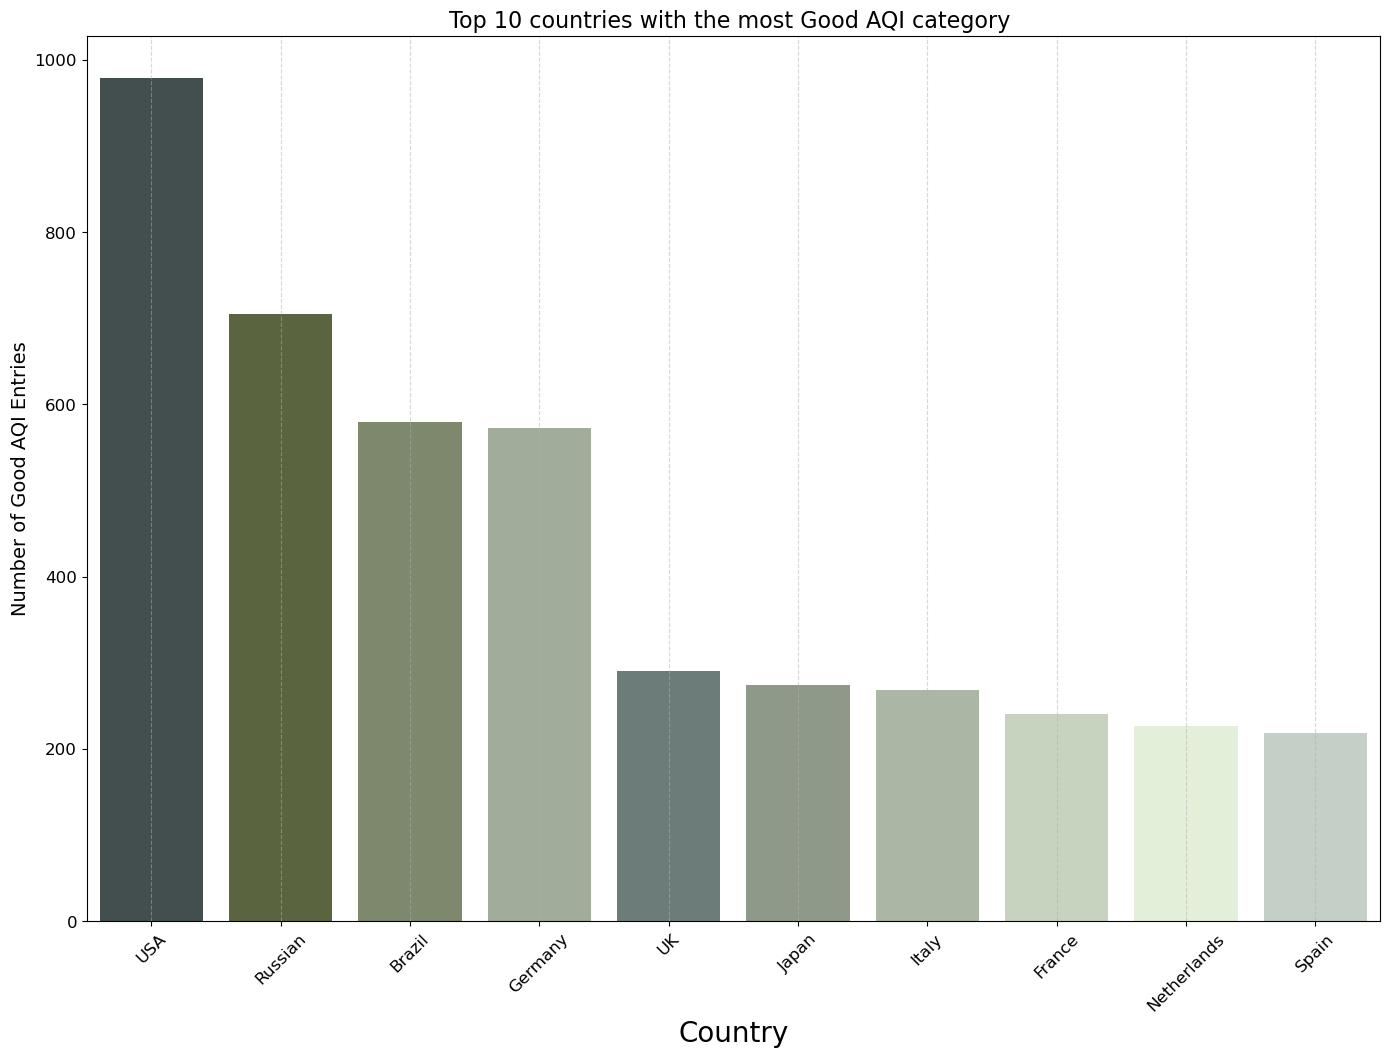

In [20]:
#as there are so many counries so we choose the 10 first counrty
low_palette = base_colors = [
    "#415151","#5c6b39", "#7e8d68", "#a0af97", "#69807a", "#8d9c87", "#aab9a1", "#c7d6bb", 
    "#e4f3d5", "#c2d1c6"
]
city_count_first_10=city_count.sort_values(by='count', ascending=False).head(10)
plt.figure(figsize=(14, 10))
sns.barplot(y='count', x='country', data=city_count_first_10, palette=low_palette)
plt.ylabel('Number of Good AQI Entries', fontsize=14)
plt.xlabel('Country', fontsize=20)
plt.title('Top 10 countries with the most Good AQI category ', fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.xticks(rotation=45)

plt.show()

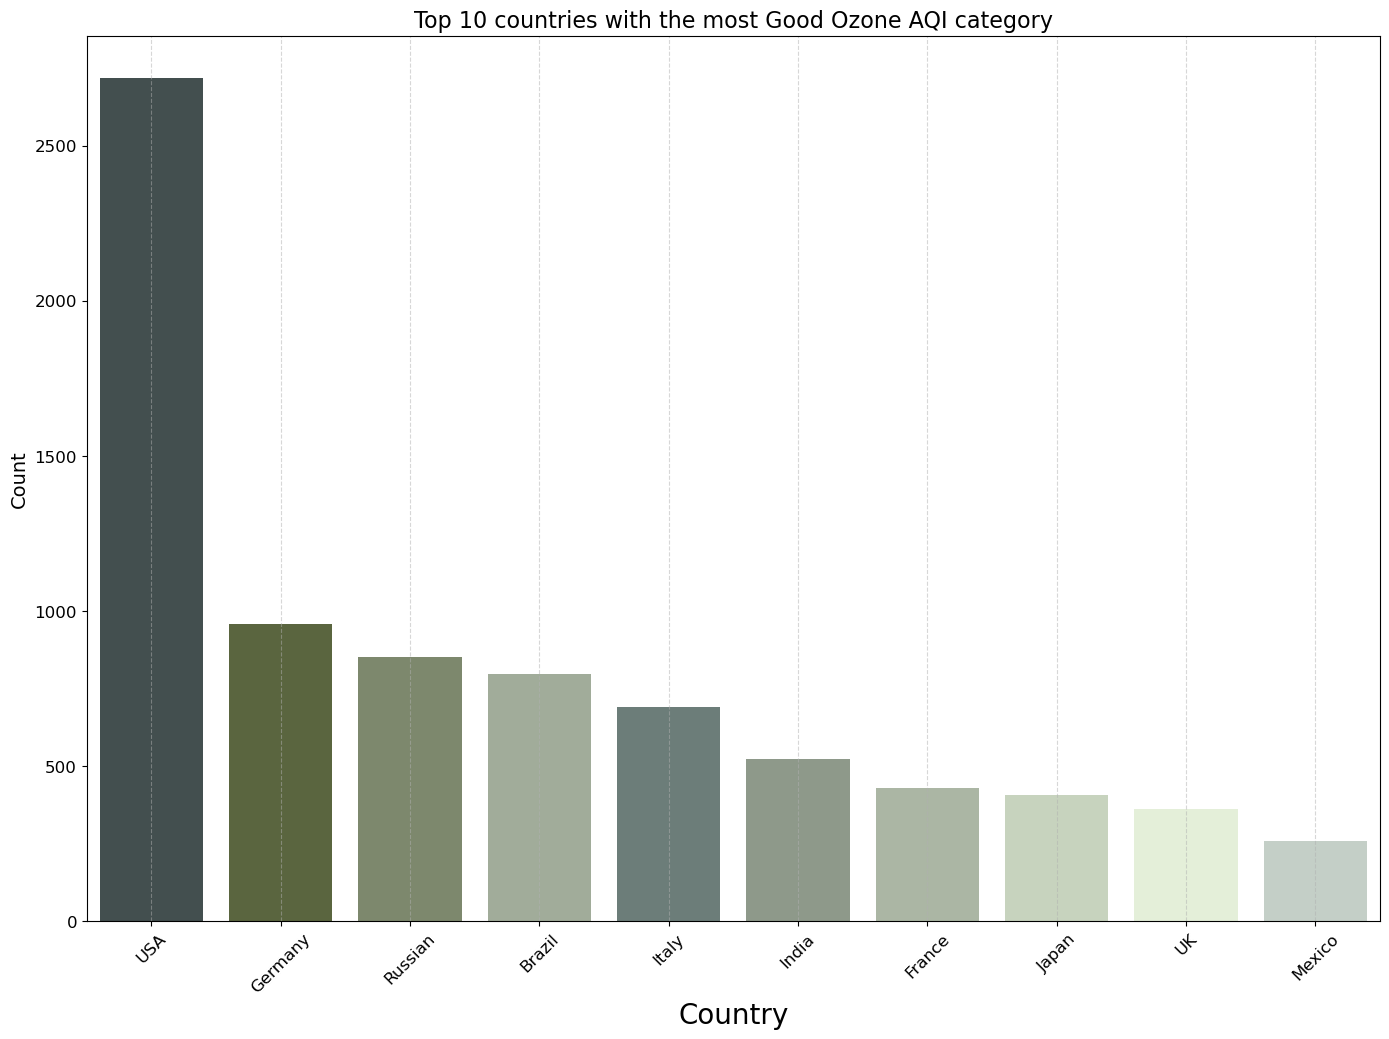

In [21]:
healthy_ozon=global_pollution_df[global_pollution_df["ozone aqi category"]=='Good']
city_count_series_ozon=healthy_ozon["country"].value_counts()
city_count_ozon= city_count_series_ozon.reset_index()

city_count_ozon.columns = ['country', 'count']

city_count_first_10=city_count_ozon.sort_values(by='count', ascending=False).head(10)
plt.figure(figsize=(14, 10))
sns.barplot(y='count', x='country', data=city_count_first_10, palette=low_palette)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Country', fontsize=20)
plt.title('Top 10 countries with the most Good Ozone AQI category', fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.xticks(rotation=45)

plt.show()

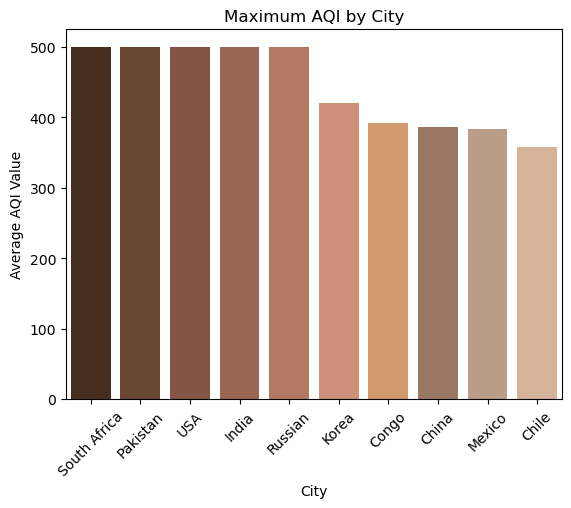

In [22]:
high_palette = base_colors = [
          "#4d2c18", "#71432b", "#8e5037", "#a86048", "#bf7255", 
    "#d9896e", "#e0985e", "#a3765a", "#c39b7e", "#e0b392"
]
max_aqi_country = global_pollution_df.groupby('country')['aqi value'].max().sort_values(ascending=False).head(10)
sns.barplot(y=max_aqi_country.values, x=max_aqi_country.index, palette=high_palette)

plt.title('Maximum AQI by City')
plt.xlabel('City')
plt.ylabel('Average AQI Value')
plt.xticks(rotation=45)

plt.show()

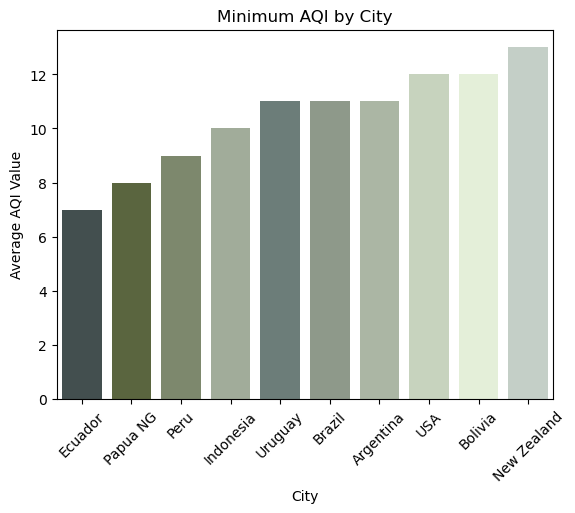

In [23]:
min_aqi_country = global_pollution_df.groupby('country')['aqi value'].min().sort_values(ascending=True).head(10)
sns.barplot(y=min_aqi_country.values, x=min_aqi_country.index, palette=low_palette)

plt.title('Minimum AQI by City')
plt.xlabel('City')
plt.ylabel('Average AQI Value')
plt.xticks(rotation=45)

plt.show()

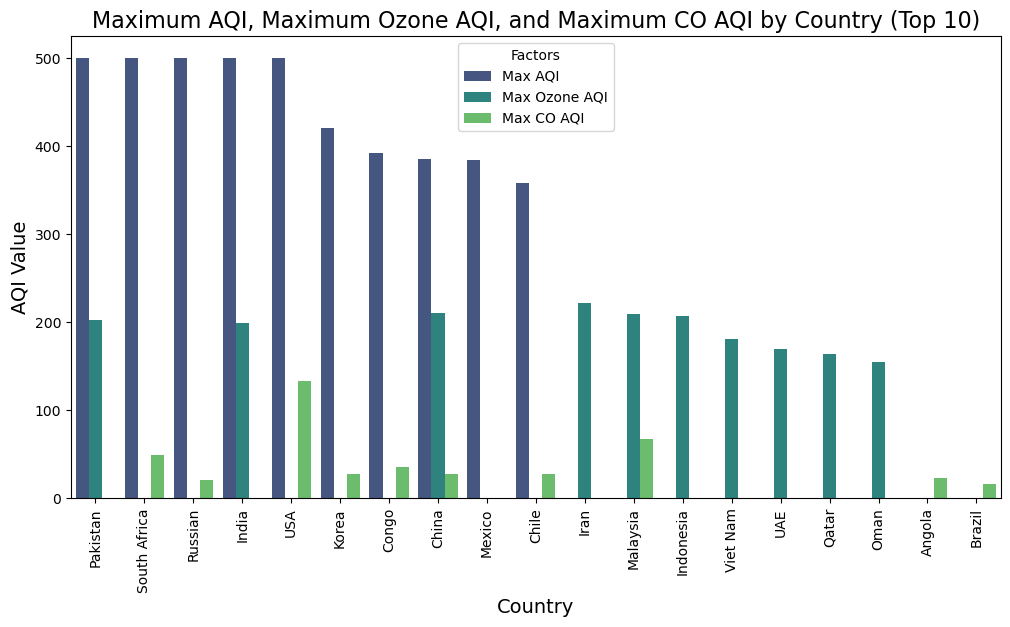

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get maximum AQI values by country
max_aqi_country = global_pollution_df.groupby('country')['aqi value'].max().sort_values(ascending=False).head(10)

# Get maximum ozone AQI values by country
max_ozone_country = global_pollution_df.groupby('country')['ozone aqi value'].max().sort_values(ascending=False).head(10)
max_co_country = global_pollution_df.groupby('country')['co aqi value'].max().sort_values(ascending=False).head(10)

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Country': max_aqi_country.index.tolist() + max_ozone_country.index.tolist() + max_co_country.index.tolist(),
    'Factor': ['Max AQI'] * 10 + ['Max Ozone AQI'] * 10 + ['Max CO AQI'] * 10,
    'Value': max_aqi_country.values.tolist() + max_ozone_country.values.tolist() + max_co_country.values.tolist()
})

# Plot the grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_data, x='Country', y='Value', hue='Factor', palette='viridis')
plt.title('Maximum AQI, Maximum Ozone AQI, and Maximum CO AQI by Country (Top 10)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('AQI Value', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title='Factors')
plt.show()


In [25]:
import folium

# Create a basemap centered on a location of your choice
m = folium.Map(location=[30, 0], zoom_start=2)

# Add markers for each country with the maximum AQI values
for country, max_aqi_value in max_aqi_country.items():
    latitude = global_pollution_df.loc[global_pollution_df['country'] == country, 'lat'].iloc[0]
    longitude = global_pollution_df.loc[global_pollution_df['country'] == country, 'lng'].iloc[0]
    folium.CircleMarker(location=[latitude, longitude],
                        radius=10,
                        popup=f"Country: {country}<br>Max AQI: {max_aqi_value}",
                        fill=True,
                        fill_opacity=0.7,
                        color='red').add_to(m)

# Add markers for each country with the maximum ozone AQI values
for country, max_ozone_value in max_ozone_country.items():
    latitude = global_pollution_df.loc[global_pollution_df['country'] == country, 'lat'].iloc[0]
    longitude = global_pollution_df.loc[global_pollution_df['country'] == country, 'lng'].iloc[0]
    folium.CircleMarker(location=[latitude, longitude],
                        radius=10,
                        popup=f"Country: {country}<br>Max Ozone AQI: {max_ozone_value}",
                        fill=True,
                        fill_opacity=0.7,
                        color='blue').add_to(m)

# Add markers for each country with the maximum CO AQI values
for country, max_co_value in max_co_country.items():
    latitude = global_pollution_df.loc[global_pollution_df['country'] == country, 'lat'].iloc[0]
    longitude = global_pollution_df.loc[global_pollution_df['country'] == country, 'lng'].iloc[0]
    folium.CircleMarker(location=[latitude, longitude],
                        radius=10,
                        popup=f"Country: {country}<br>Max CO AQI: {max_co_value}",
                        fill=True,
                        fill_opacity=0.7,
                        color='green').add_to(m)

# Display the map
m


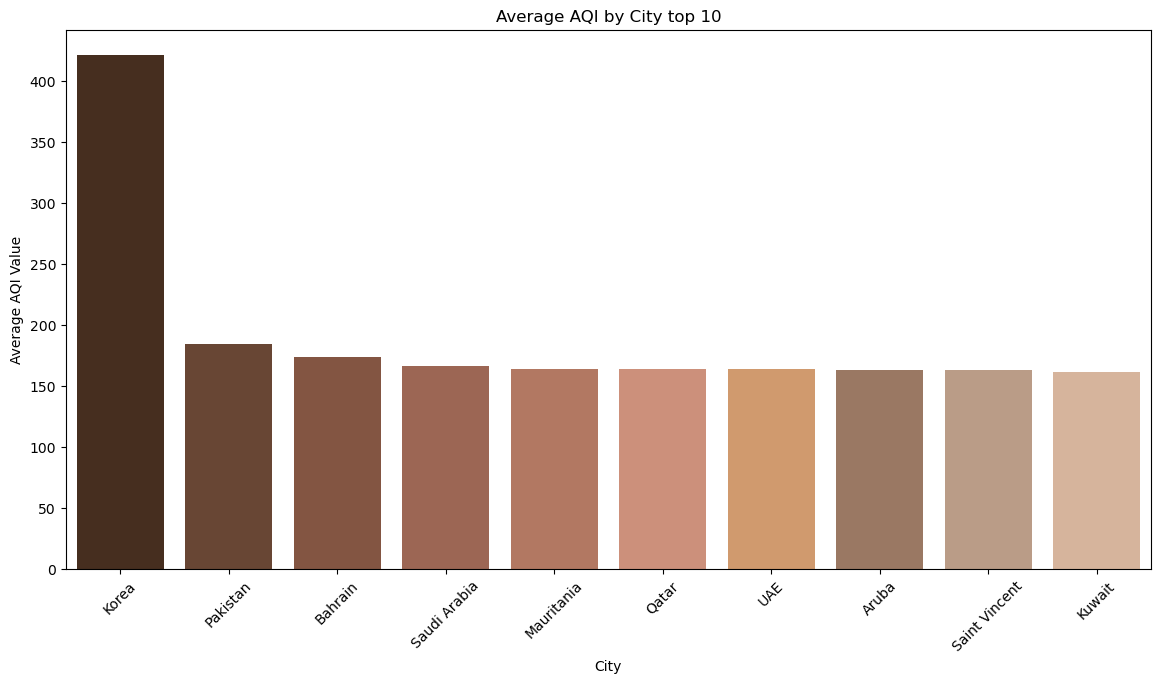

country              city  aqi value aqi category  co aqi value  \
0  Russian        Praskoveya         51     Moderate             1   
1   Brazil  Presidente Dutra         41         Good             1   
3    Italy   Priolo Gargallo         66     Moderate             1   
4   Poland         Przasnysz         34         Good             1   
5      USA       Punta Gorda         54     Moderate             1   

  co aqi category  ozone aqi value ozone aqi category  no2 aqi value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
3            Good               39               Good              2   
4            Good               34               Good              0   
5            Good               14               Good             11   

  no2 aqi category  pm2.5 aqi value pm2.5 aqi category      lat      lng  
0             Good               51           Moderate  44.7444  44.2031  
1             Good               41               Good  -5.2900 -44.4900  
3             Good               66           Moderate  37.1667  15.1833  
4             Good               20               Good  53.0167  20.8833  
5             Good               54           Moderate  16.1005 -88.8074

In [79]:
##needs unhelathy pallte
very_unhealthy=global_pollution_df[global_pollution_df["aqi category"]=='Hazardous']

top_n = 10 
plt.figure(figsize=(14, 7))
avg_aqi_city = global_pollution_df.groupby('country')['aqi value'].mean().sort_values(ascending=False).head(10)
sns.barplot(y=avg_aqi_city.values, x=avg_aqi_city.index, palette=high_palette)

#avg_aqi_city.plot(kind='bar')
plt.title('Average AQI by City top 10')
plt.xlabel('City')
plt.ylabel('Average AQI Value')
plt.xticks(rotation=45)

plt.show()
global_pollution_df_clean.head()



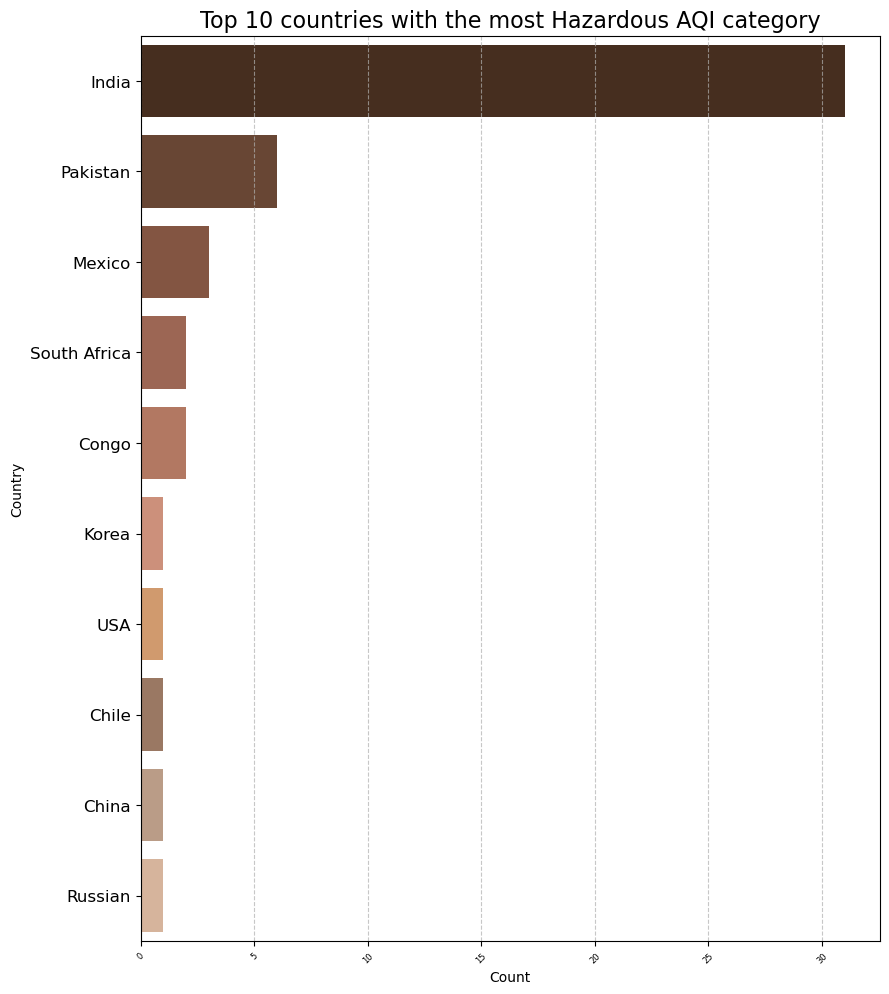

In [53]:
#the countries with hazardous conditions
very_unhealthy=global_pollution_df[global_pollution_df["aqi category"]=='Hazardous']
city_count_series2=very_unhealthy["country"].value_counts()
city_count2= city_count_series2.reset_index()

city_count2.columns = ['country', 'count']

plt.figure(figsize=(9, 10))
sns.barplot(y='country', x='count', data=city_count2, palette=high_palette)
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Top 10 countries with the most Hazardous AQI category', fontsize=16)
plt.xticks(fontsize=6)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(rotation=45)


plt.show()

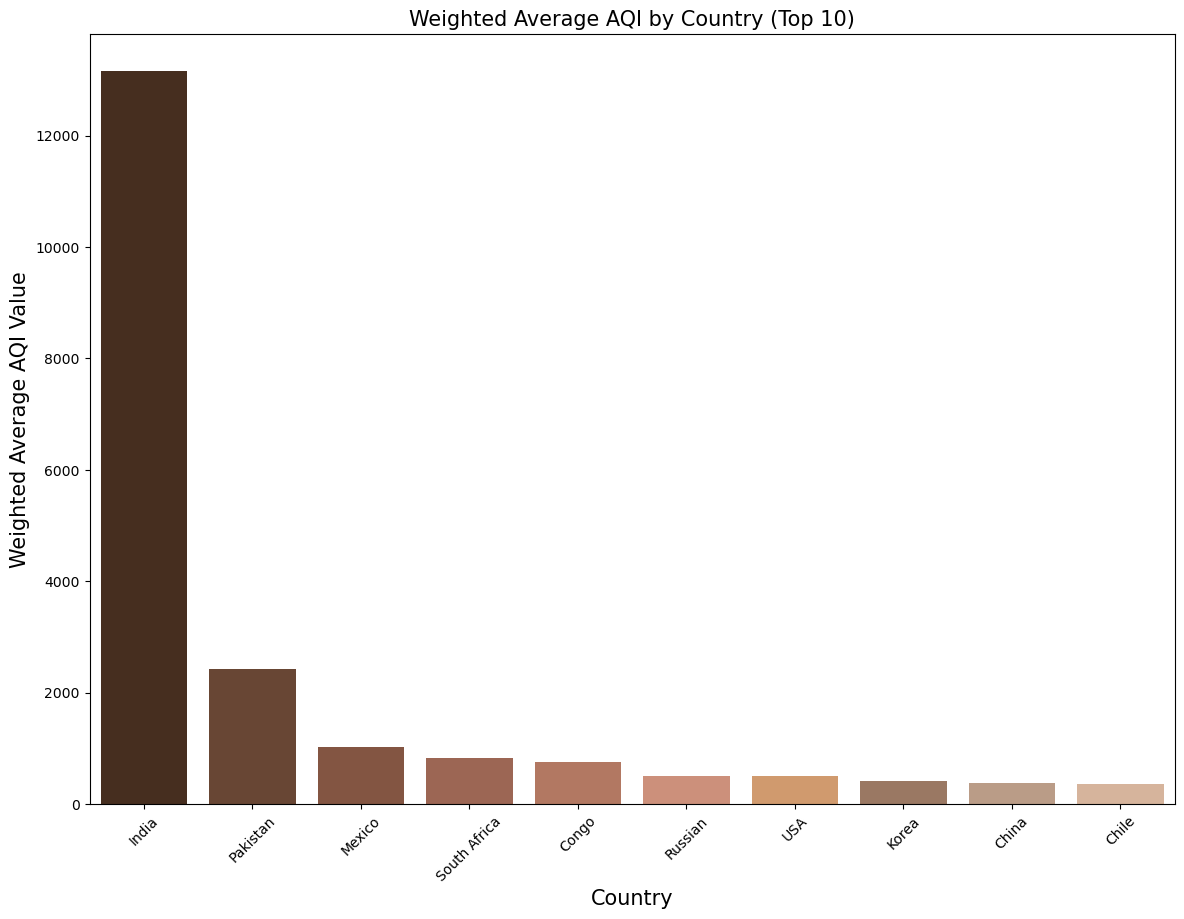

In [88]:
# Compute the weighted average AQI value by country

weighted_avg_aqi_country = very_unhealthy.groupby('country').apply(lambda x: np.sum(x['aqi value'] 
                 * x['aqi value'].count()) / np.sum(x['aqi value'].count())).sort_values(ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(14, 10))
sns.barplot(y=weighted_avg_aqi_country.values, x=weighted_avg_aqi_country.index, palette=high_palette)
plt.title('Weighted Average AQI by Country (Top 10)', fontsize=15)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Weighted Average AQI Value', fontsize=15)
plt.xticks(rotation=45)
plt.show()

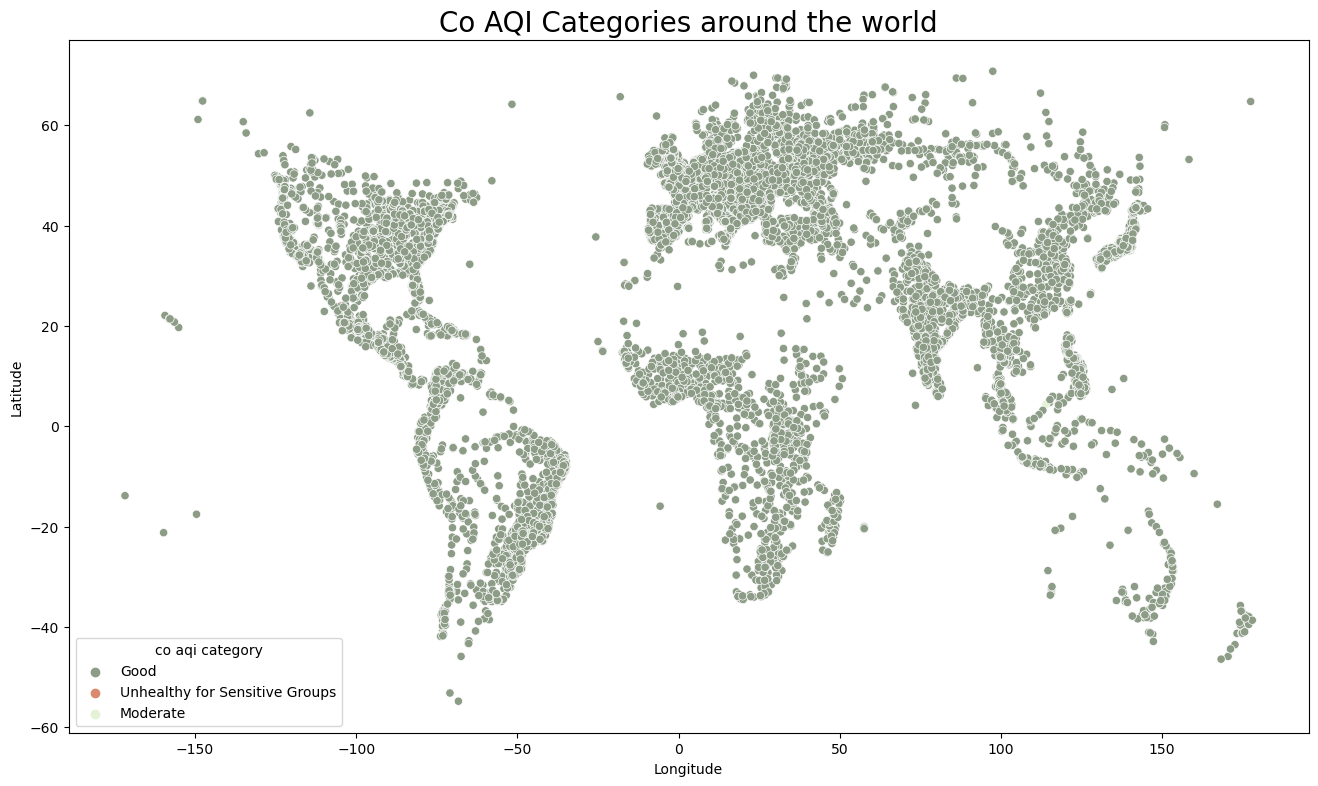

In [29]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=global_pollution_df,x='lng',y='lat',hue='co aqi category',palette=category_palette)
plt.title('Co AQI Categories around the world',fontsize=20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

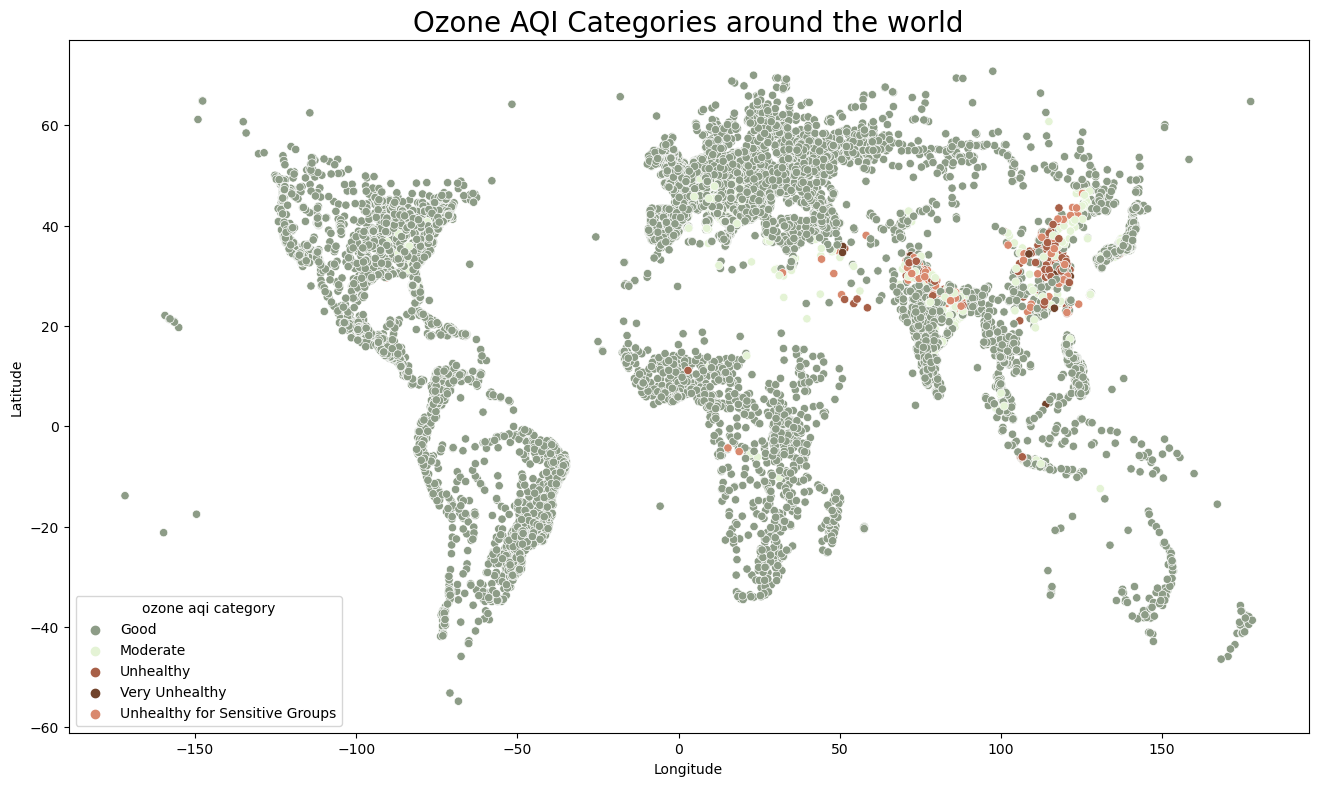

In [30]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=global_pollution_df,x='lng',y='lat',hue='ozone aqi category',palette=category_palette)
plt.title('Ozone AQI Categories around the world',fontsize=20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

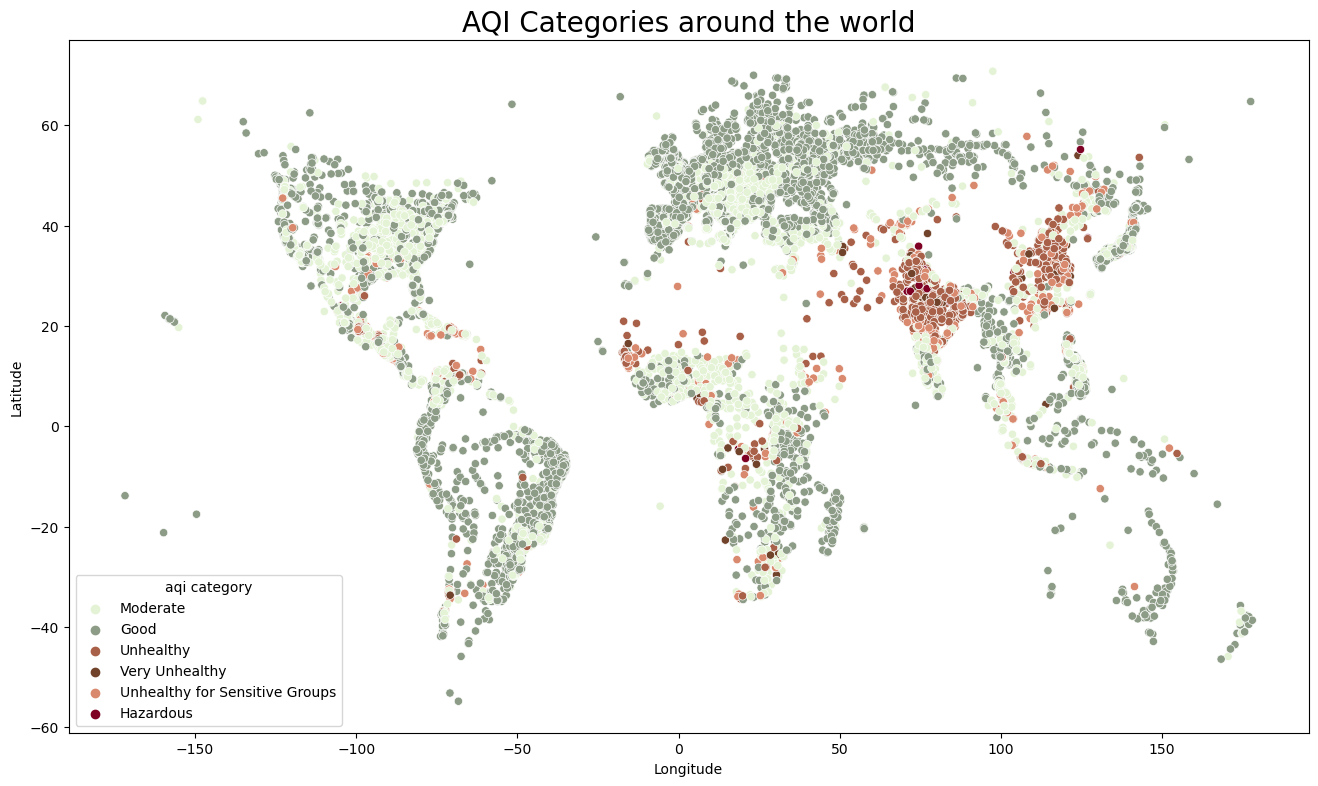

In [31]:
#df_dropped_col = global_pollution_df.drop(['country', 'city','aqi value', 'aqi category'],axis=1)
plt.figure(figsize=(16,9))
sns.scatterplot(data=global_pollution_df,x='lng',y='lat',hue='aqi category',palette=category_palette)
plt.title('AQI Categories around the world',fontsize=20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<Figure size 1600x900 with 0 Axes>

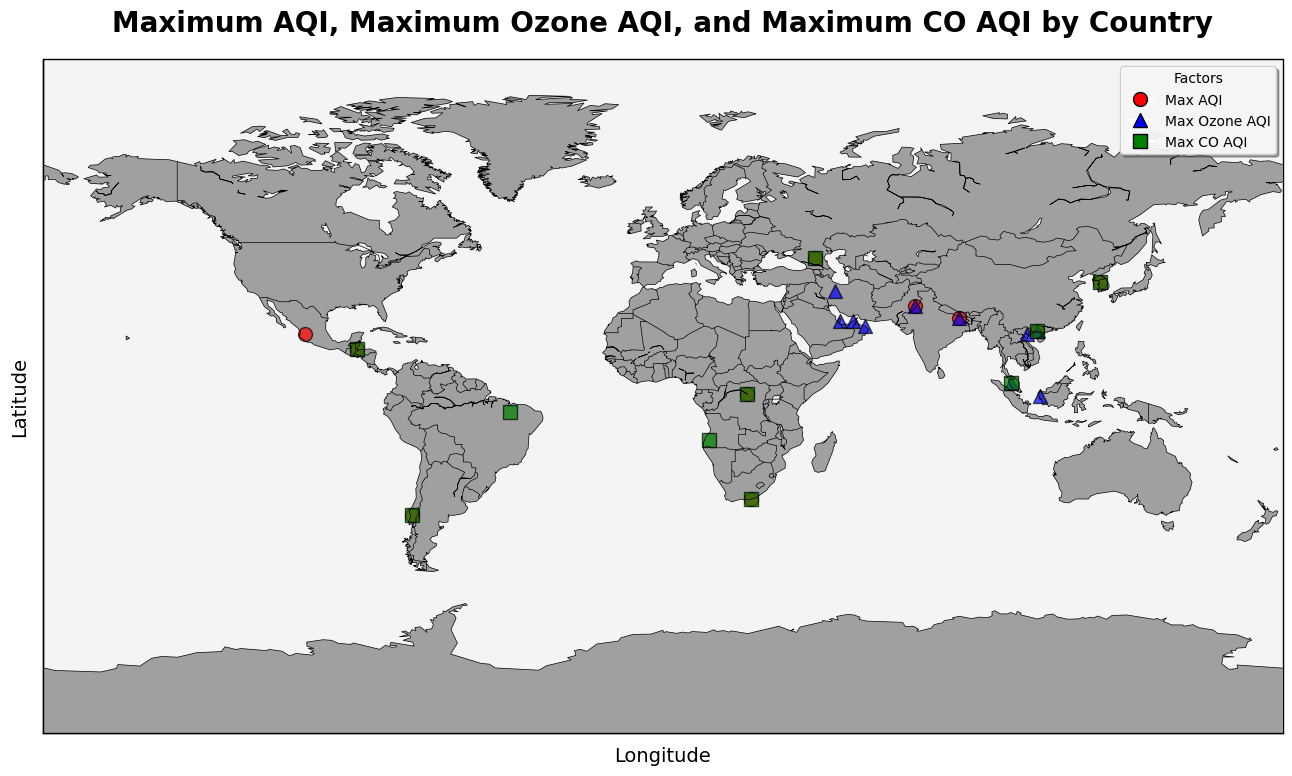

In [32]:
import matplotlib.pyplot as plt
from geomap import Map  # Adjust the import based on the new module name

# Initialize the Map
my_map = Map(projection='gall', fig_x=16, fig_y=9)

# Plot the base map
fig, ax = plt.subplots(figsize=(16, 9))
my_map._map.drawcoastlines(ax=ax, linewidth=0.5)
my_map._map.drawcountries(ax=ax, linewidth=0.5)
my_map._map.fillcontinents(color='#A0A0A0', lake_color='#f4f4f4', ax=ax)
my_map._map.drawmapboundary(fill_color='#f4f4f4', ax=ax)

# Function to get latitude and longitude for a given country
def get_lat_lng(country):
    lat_lng = global_pollution_df.loc[global_pollution_df['country'] == country, ['lat', 'lng']].iloc[0]
    return lat_lng['lat'], lat_lng['lng']

# Scatter plot data for maximum AQI values
for idx, country in enumerate(max_aqi_country.index):
    lat, lng = get_lat_lng(country)
    x, y = my_map._map(lng, lat)
    ax.scatter(x, y, color='red', edgecolor='k', alpha=0.7, s=100, marker='o', label='Max AQI' if idx == 0 else None)

# Scatter plot data for maximum ozone AQI values
for idx, country in enumerate(max_ozone_country.index):
    lat, lng = get_lat_lng(country)
    x, y = my_map._map(lng, lat)
    ax.scatter(x, y, color='blue', edgecolor='k', alpha=0.7, s=100, marker='^', label='Max Ozone AQI' if idx == 0 else None)

# Scatter plot data for maximum CO AQI values
for idx, country in enumerate(max_co_country.index):
    lat, lng = get_lat_lng(country)
    x, y = my_map._map(lng, lat)
    ax.scatter(x, y, color='green', edgecolor='k', alpha=0.7, s=100, marker='s', label='Max CO AQI' if idx == 0 else None)

# Add a legend with colors
legend_labels = ['Max AQI', 'Max Ozone AQI', 'Max CO AQI']
legend_handles = [plt.Line2D([0], [0], marker=marker, color='w', label=label,
                             markersize=10, markerfacecolor=color, markeredgecolor='k')
                  for label, color, marker in zip(legend_labels, ['red', 'blue', 'green'], ['o', '^', 's'])]
legend = ax.legend(handles=legend_handles, title='Factors', loc='upper right', frameon=True, framealpha=0.9, shadow=True)

# Title and labels with enhanced styling
plt.title('Maximum AQI, Maximum Ozone AQI, and Maximum CO AQI by Country', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Longitude', fontsize=14, labelpad=10)
plt.ylabel('Latitude', fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Enhance the grid
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Display the plot
plt.show()


In [33]:
max_aqi_country

country
South Africa    500
Pakistan        500
USA             500
India           500
Russian         500
Korea           421
Congo           392
China           386
Mexico          384
Chile           358
Name: aqi value, dtype: int64

In [36]:
import folium
import pandas as pd

# Example DataFrame (replace this with your actual data)
# df = pd.read_csv('your_data_file.csv')
# Assuming df_dropped_col is your DataFrame after dropping the specified columns
df_dropped_col = global_pollution_df.drop(['country', 'city', 'no2 aqi value', 'no2 aqi category'], axis=1)

# Custom palette mapping AQI categories to specific colors
aqi_category_colors = {
    'Good': '#8d9c87',
    'Moderate': '#e4f3d5',
    'Unhealthy for Sensitive Groups': '#d9896e',
    'Unhealthy': '#a86048',
    'Very Unhealthy': '#71432b',
    'Hazardous': '#7e0023'
}

# Create a folium map centered around the world
map_center = [0, 0]  # Center of the map
mymap = folium.Map(location=map_center, zoom_start=2)

# Add points to the map
for idx, row in df_dropped_col.iterrows():
    folium.CircleMarker(
        location=(row['lat'], row['lng']),
        radius=5,
        color=aqi_category_colors[row['aqi category']],
        fill=True,
        fill_color=aqi_category_colors[row['aqi category']],
        fill_opacity=0.7,
        popup=f"AQI Category: {row['aqi category']}"
    ).add_to(mymap)

# Save the map to an HTML file
mymap.save('dynamic_aqi_map.html')

# If you're using a Jupyter notebook, you can display the map directly
#mymap


In [35]:
#the countries with hazardous conditions
Hazardous_ozone=global_pollution_df[global_pollution_df["ozone aqi category"]=='']
city_count_series_ozone=Hazardous_ozone["country"].value_counts()
city_count_ozone= city_count_series_ozone.reset_index()

city_count_ozone.columns = ['country', 'count']

plt.figure(figsize=(9, 10))
sns.barplot(y='count', x='country', data=city_count_ozone, palette='viridis')
plt.ylabel('Count', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.title('Number of Hazardous AQI Entries by Country', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

ValueError: min() iterable argument is empty

<Figure size 900x1000 with 0 Axes>

In [ ]:
very_unhealthy=global_pollution_df[global_pollution_df["ozone aqi category"]=='Hazardous']
very_unhealthy.head(10)

Empty DataFrame
Columns: [country, city, aqi value, aqi category, co aqi value, co aqi category, ozone aqi value, ozone aqi category, no2 aqi value, no2 aqi category, pm2.5 aqi value, pm2.5 aqi category, lat, lng]
Index: []

/home/eli/miniconda3/lib/python3.12/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


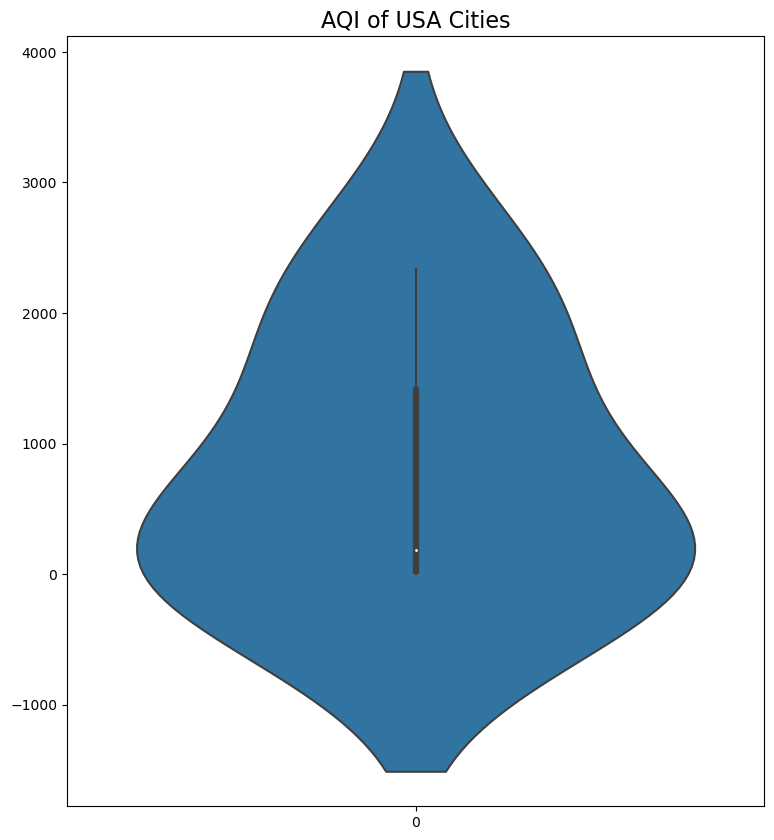

In [ ]:
city_count_india=global_pollution_df[global_pollution_df['country']== 'USA']['aqi category'].value_counts()
city_count_india.reset_index()

colors = list(category_palette.values())


plt.figure(figsize=(9, 10))
sns.violinplot(data=city_count_india,colors=colors)

#plt.pie(city_count_india, labels=city_count_india.index, autopct='%1.1f%%', startangle=140, colors=colors)

plt.title('AQI of USA Cities', fontsize=16)

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a matrix of counts or frequencies stored in a variable called 'data'

# Create a heatmap
sns.heatmap(data=city_count_india, cmap='coolwarm', annot=True, fmt="d")  # cmap sets the color palette, annot adds annotations, fmt specifies annotation format

# Set labels and title
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('Heatmap')

# Show the plot
plt.show()


IndexError: Inconsistent shape between the condition and the input (got (5, 1) and (5,))

In [ ]:
global_pollution_df[global_pollution_df['country']== 'Republic of Korea'].head()

country   city  aqi value aqi category  co aqi value  \
960  Republic of Korea  Seoul        421    Hazardous            27   

    co aqi category  ozone aqi value ozone aqi category  no2 aqi value  \
960            Good                0               Good             91   

    no2 aqi category  pm2.5 aqi value pm2.5 aqi category    lat     lng  
960         Moderate              415          Hazardous  37.56  126.99

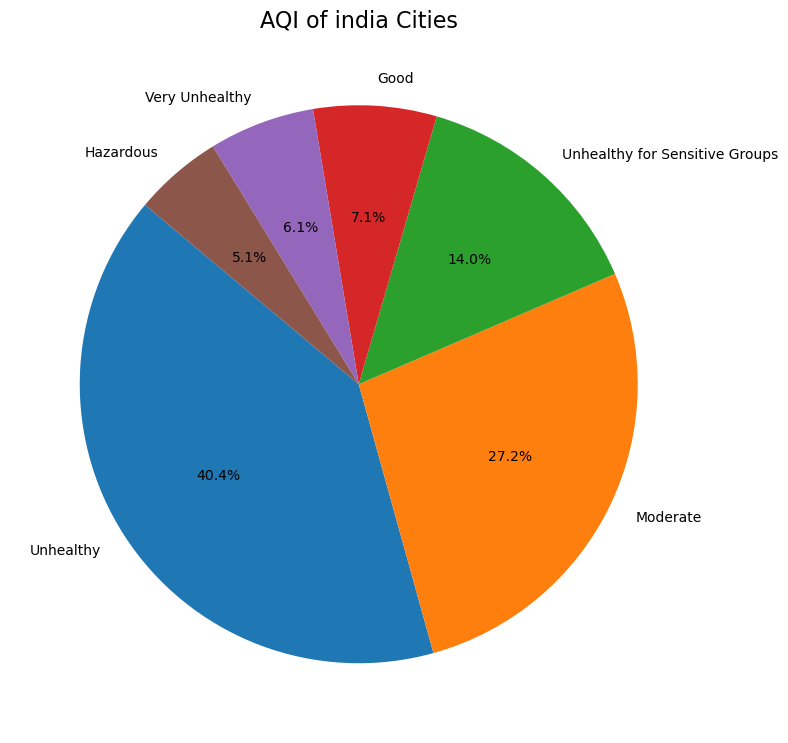

In [ ]:
city_count_india=global_pollution_df[global_pollution_df['country']== 'India']['aqi category'].value_counts()
city_count_india.reset_index()



plt.figure(figsize=(9, 10))
plt.pie(city_count_india, labels=city_count_india.index, autopct='%1.1f%%', startangle=140,colors=C)

plt.title('AQI of india Cities', fontsize=16)

plt.show()


/home/eli/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/eli/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/eli/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/eli/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

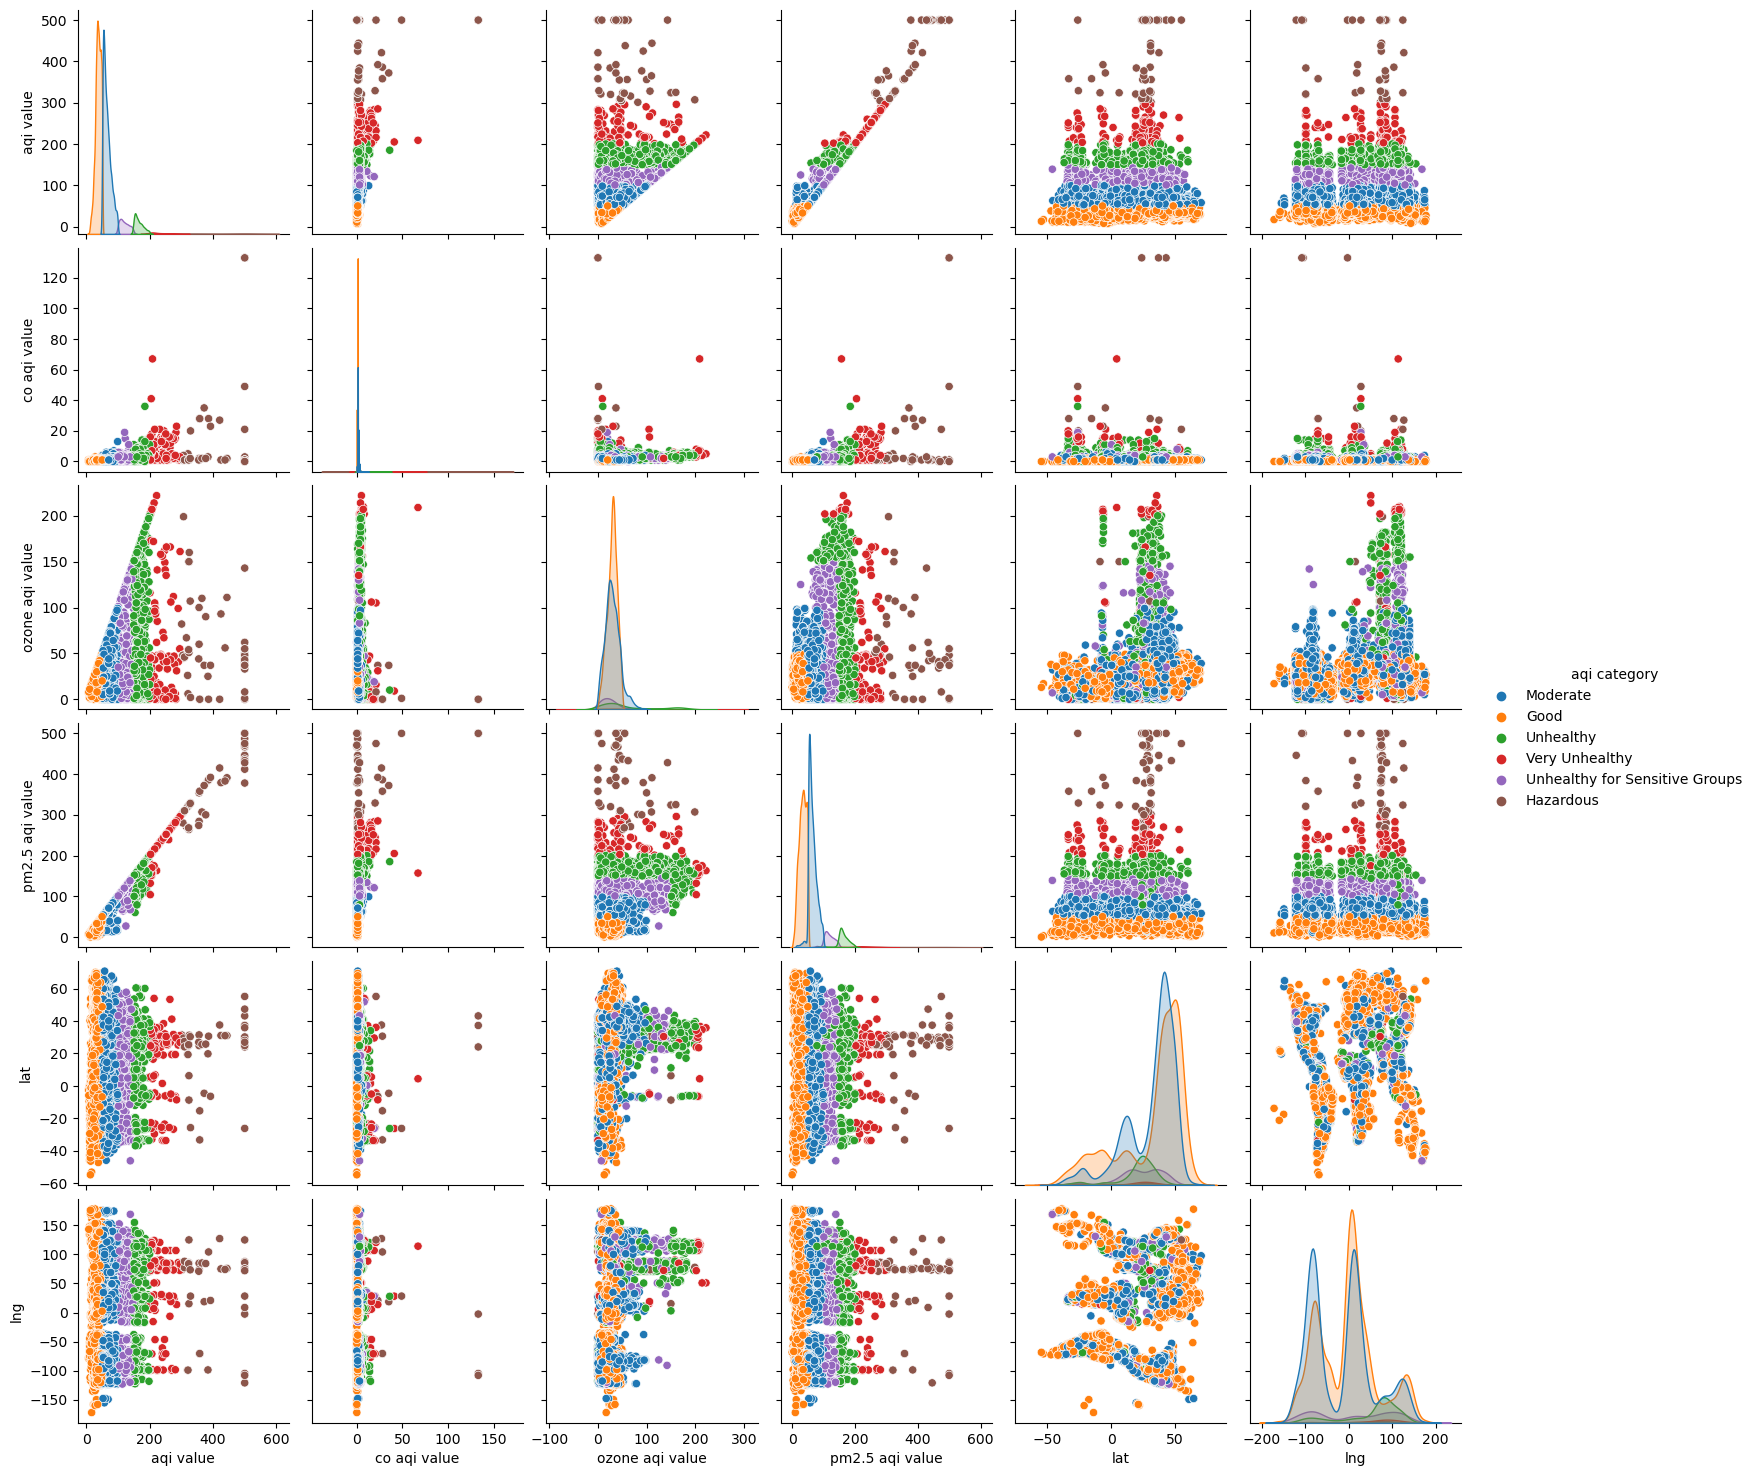

In [ ]:
sns.pairplot(df_dropped_col,hue='aqi category')
plt.show()

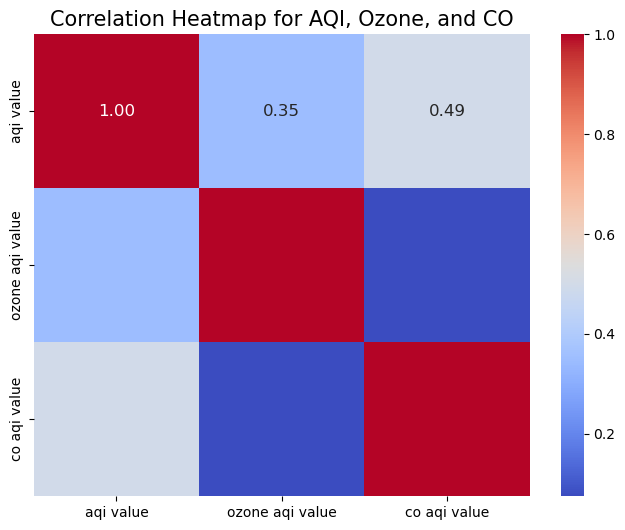

In [83]:

# Calculate correlation matrix
corr_matrix = global_pollution_df[['aqi value', 'ozone aqi value', 'co aqi value']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Heatmap for AQI, Ozone, and CO', fontsize=15)
plt.show()



/home/eli/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/eli/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/eli/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


NameError: name 'plt' is not defined

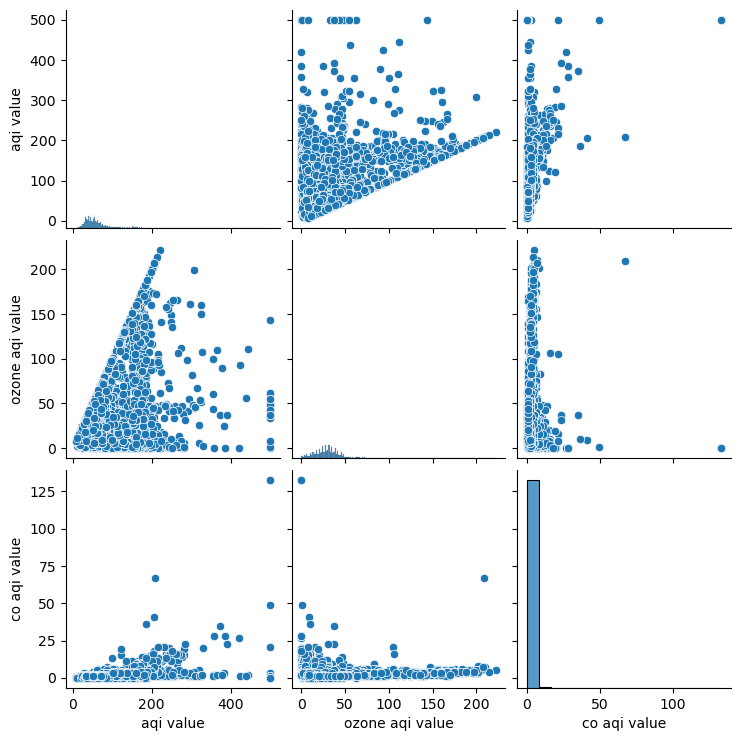

In [2]:
import seaborn as sns

# Create a pairplot
sns.pairplot(global_pollution_df[['aqi value', 'ozone aqi value', 'co aqi value']])
plt.suptitle('Pairplot of AQI, Ozone, and CO', fontsize=15)
plt.show()


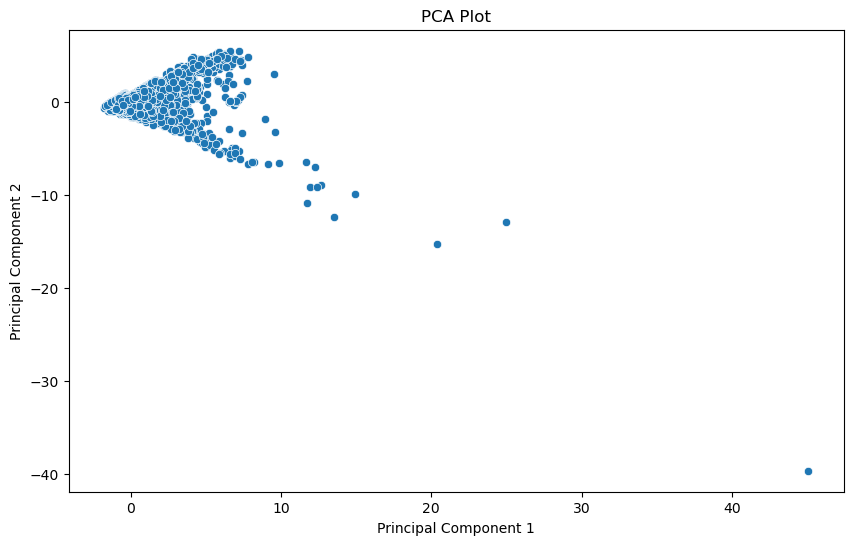

Explained Variance Ratio: [0.54704111 0.30996412]


In [86]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(global_pollution_df[['aqi value', 'ozone aqi value', 'co aqi value']])

# Perform PCA
pca = PCA(n_components=2)  # Choose the number of principal components
principal_components = pca.fit_transform(scaled_data)

# Create DataFrame of principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenate principal components with original DataFrame
final_df = pd.concat([principal_df, global_pollution_df[['aqi value', 'ozone aqi value', 'co aqi value']]], axis=1)

# Visualize results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=final_df)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.show()

# Explained variance ratio
print('Explained Variance Ratio:', pca.explained_variance_ratio_)
